<a href="https://colab.research.google.com/github/vikram0050/Zomato-Restaurant-Clustering-And-Sentiment-Analysis/blob/main/Vikramaditya_Sah_ZOMATO_RESTAURANT_CLUSTERING_AND_SENTIMENT_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Zomato Restaurant Clustering and Sentiment Analysis**




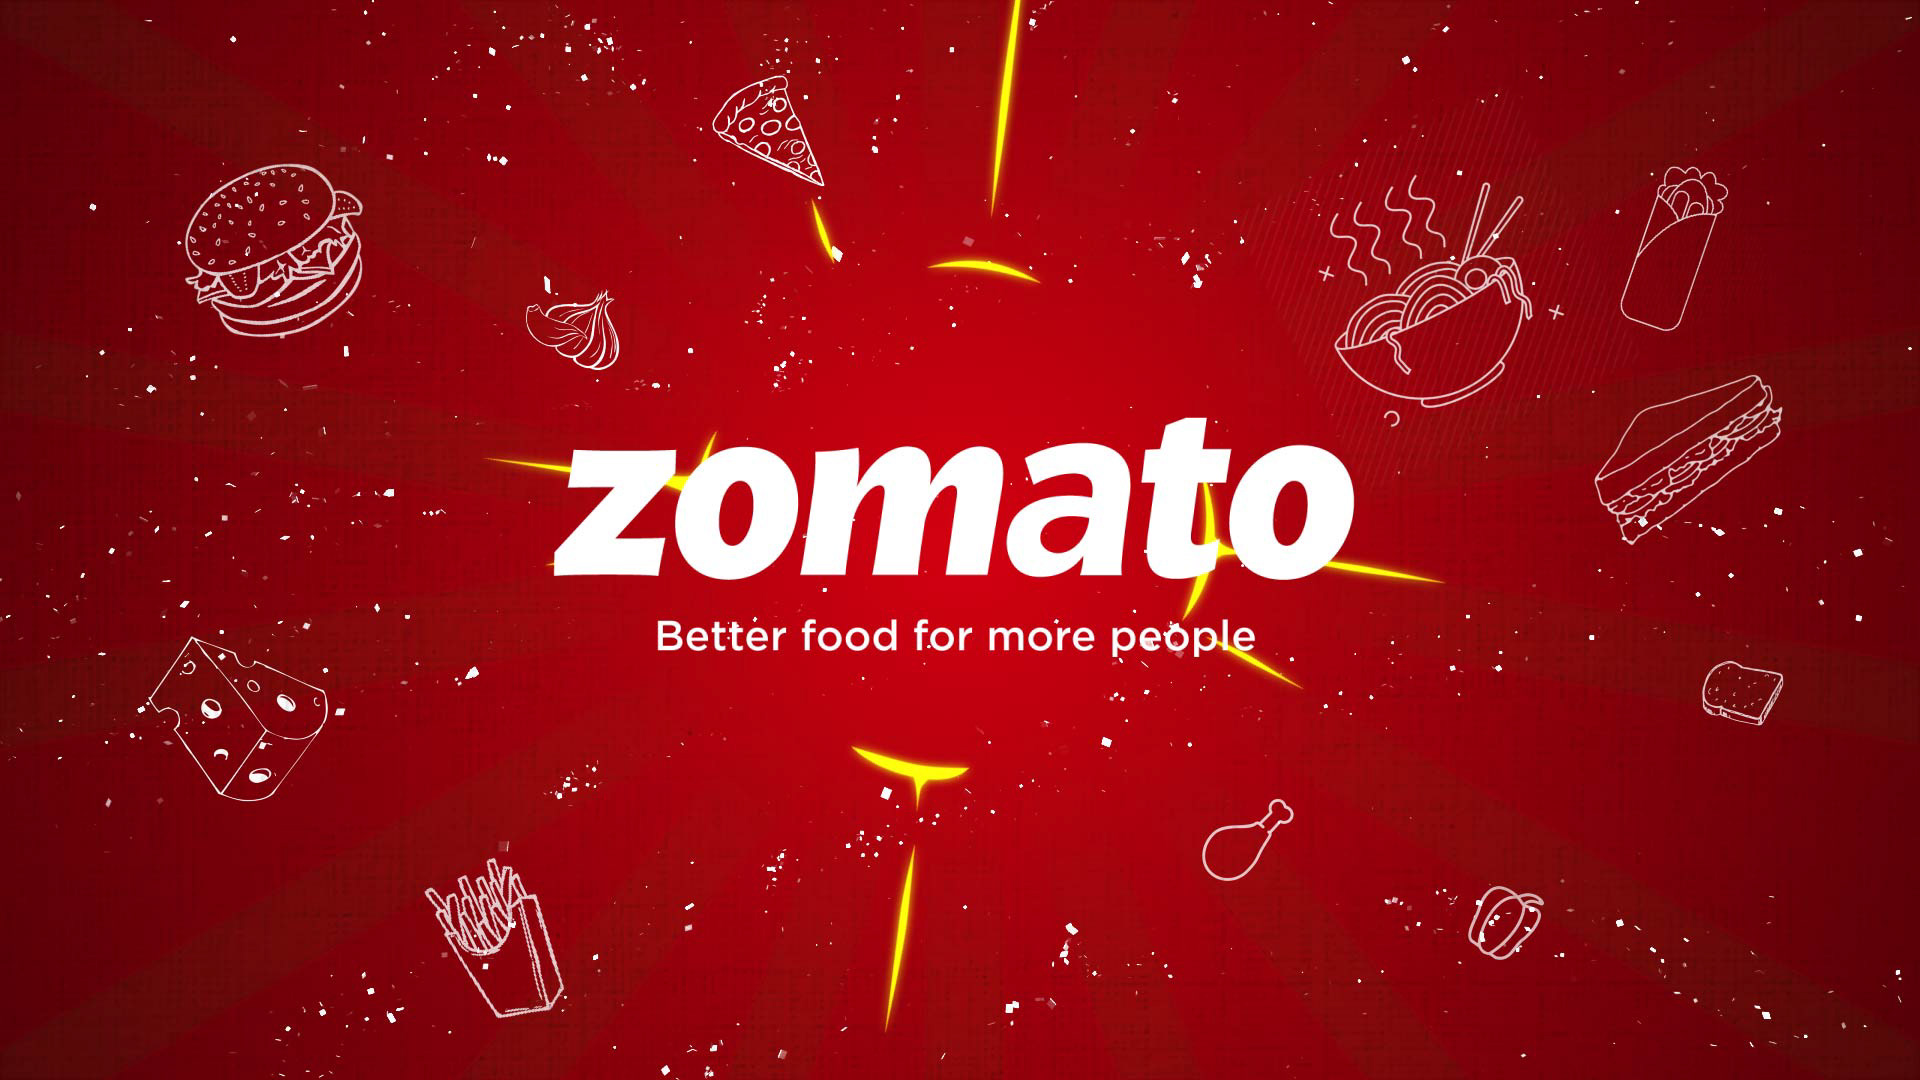

**PROBLEM STATEMENT**

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

The Project focuses on Customers and Company, you have  to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry. 

# **Attribute Information**

# **Zomato Restaurant names and Metadata**
Use this dataset for clustering part

1. Name : Name of Restaurants

2. Links : URL Links of Restaurants

3. Cost : Per person estimated Cost of dining

4. Collection : Tagging of Restaurants w.r.t. Zomato categories

5. Cuisines : Cuisines served by Restaurants

6. Timings : Restaurant Timings

## **Zomato Restaurant reviews**
Merge this dataset with Names and Matadata and then use for sentiment analysis part

1. Restaurant : Name of the Restaurant

2. Reviewer : Name of the Reviewer

3. Review : Review Text

4. Rating : Rating Provided by Reviewer

5. MetaData : Reviewer Metadata - No. of Reviews and followers

6. Time: Date and Time of Review

7. Pictures : No. of pictures posted with review

#Importing

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
#importing all the important librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import time
from wordcloud import WordCloud
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, plot_precision_recall_curve
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set_style("whitegrid",{'grid.linestyle': '--'})

# Set the display figure size using rcParams method 
sns.set(rc={'figure.figsize':(10,6)})
plt.rcParams['figure.figsize'] = [10,6]

# importing data files 
meta_df = pd.read_csv('/content/drive/MyDrive/Zomato-Restaurant-Clustering-And-Sentiment-Analysis - Vikramaditya Sah/Zomato Restaurant names and Metadata.csv')
reviews_df = pd.read_csv('/content/drive/MyDrive/Zomato-Restaurant-Clustering-And-Sentiment-Analysis - Vikramaditya Sah/Zomato Restaurant reviews.csv')

# Dataset inspection

# META DATA

In [17]:
# to get the first five rows of the data set 
meta_df.head()

Name  \
0                 Beyond Flavours   
1                        Paradise   
2                        Flechazo   
3  Shah Ghouse Hotel & Restaurant   
4      Over The Moon Brew Company   

                                               Links   Cost  \
0  https://www.zomato.com/hyderabad/beyond-flavou...    800   
1  https://www.zomato.com/hyderabad/paradise-gach...    800   
2  https://www.zomato.com/hyderabad/flechazo-gach...  1,300   
3  https://www.zomato.com/hyderabad/shah-ghouse-h...    800   
4  https://www.zomato.com/hyderabad/over-the-moon...  1,200   

                                         Collections  \
0  Food Hygiene Rated Restaurants in Hyderabad, C...   
1                                Hyderabad's Hottest   
2                 Great Buffets, Hyderabad's Hottest   
3                             Late Night Restaurants   
4  Best Bars & Pubs, Food Hygiene Rated Restauran...   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   
1                     Biryani, North Indian, Chinese   
2       Asian, Mediterranean, North Indian, Desserts   
3  Biryani, North Indian, Chinese, Seafood, Bever...   
4  Asian, Continental, North Indian, Chinese, Med...   

                                             Timings  
0      12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  
1                                     11 AM to 11 PM  
2              11:30 AM to 4:30 PM, 6:30 PM to 11 PM  
3                                    12 Noon to 2 AM  
4  12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...

In [18]:
# to get the information about the data
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [19]:
# finding the count of null values
meta_df.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

Observation : we have 54 null Values in collection Column

In [20]:
# to get the description of the data
meta_df.describe().transpose()

count unique                                                top  \
Name          105    105                                    Beyond Flavours   
Links         105    105  https://www.zomato.com/hyderabad/beyond-flavou...   
Cost          105     29                                                500   
Collections    51     42        Food Hygiene Rated Restaurants in Hyderabad   
Cuisines      105     92                              North Indian, Chinese   
Timings       104     77                                     11 AM to 11 PM   

            freq  
Name           1  
Links          1  
Cost          13  
Collections    4  
Cuisines       4  
Timings        6

In [21]:
#checking for duplicate entries
print(len(meta_df.drop_duplicates()))
print(len(meta_df['Name'].drop_duplicates()))

105
105


In [22]:
# checking dType and non null values
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [23]:
# checking for unique values in cost function
meta_df.Cost.value_counts()

500      13
600      10
700       8
1,200     7
400       6
1,000     6
200       5
800       5
1,500     5
1,300     4
350       3
1,600     3
750       3
550       3
900       3
1,100     3
1,700     2
150       2
1,400     2
450       2
1,900     2
300       1
2,500     1
850       1
650       1
1,800     1
2,800     1
1,750     1
250       1
Name: Cost, dtype: int64

In [24]:
# changing the data type of the cost function
meta_df['Cost'] = meta_df['Cost'].str.replace(",","").astype('int64')

# Reviews

In [25]:
# to get the first five rows of the data set 
reviews_df.head()

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review Rating  \
0  The ambience was good, food was quite good . h...      5   
1  Ambience is too good for a pleasant evening. S...      5   
2  A must try.. great food great ambience. Thnx f...      5   
3  Soumen das and Arun was a great guy. Only beca...      5   
4  Food is good.we ordered Kodi drumsticks and ba...      5   

                  Metadata             Time  Pictures  
0   1 Review , 2 Followers  5/25/2019 15:54         0  
1  3 Reviews , 2 Followers  5/25/2019 14:20         0  
2  2 Reviews , 3 Followers  5/24/2019 22:54         0  
3    1 Review , 1 Follower  5/24/2019 22:11         0  
4  3 Reviews , 2 Followers  5/24/2019 21:37         0

In [26]:
# to get the information about the data
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [27]:
# finding the count of null values
reviews_df.isnull().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

In [28]:
reviews_df['Rating'].value_counts()

5       3832
4       2373
1       1735
3       1193
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: Rating, dtype: int64

observation : we can see here there is one rating filled as category i.e 'Like'

In [29]:
# substitutiong 'like' observation first by nan values ans then by mean of the feature 
reviews_df.loc[reviews_df['Rating'] == 'Like'] = np.nan
reviews_df['Rating'] = reviews_df['Rating'].astype('float64')
print(reviews_df['Rating'].mean())

3.601044071880333


In [30]:
# since the mean is 3.6 we will round off it by 3.5
reviews_df['Rating'].fillna(3.5,inplace=True)

In [31]:
# feature engineering the data
reviews_df['Reviews'],reviews_df['Followers']=reviews_df['Metadata'].str.split(',').str
reviews_df['Reviews'] = pd.to_numeric(reviews_df['Reviews'].str.split(' ').str[0])
reviews_df['Followers'] = pd.to_numeric(reviews_df['Followers'].str.split(' ').str[1])
reviews_df['Time']=pd.to_datetime(reviews_df['Time'])
reviews_df['Year'] = pd.DatetimeIndex(reviews_df['Time']).year
reviews_df['Month'] = pd.DatetimeIndex(reviews_df['Time']).month
reviews_df['Hour'] = pd.DatetimeIndex(reviews_df['Time']).hour
reviews_df = reviews_df.drop(['Metadata'], axis =1)

In [32]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Restaurant  9999 non-null   object        
 1   Reviewer    9961 non-null   object        
 2   Review      9954 non-null   object        
 3   Rating      10000 non-null  float64       
 4   Time        9961 non-null   datetime64[ns]
 5   Pictures    9999 non-null   float64       
 6   Reviews     9961 non-null   float64       
 7   Followers   8383 non-null   float64       
 8   Year        9961 non-null   float64       
 9   Month       9961 non-null   float64       
 10  Hour        9961 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(3)
memory usage: 859.5+ KB


In [33]:
#checking for null values
reviews_df.isna().sum()

Restaurant       1
Reviewer        39
Review          46
Rating           0
Time            39
Pictures         1
Reviews         39
Followers     1617
Year            39
Month           39
Hour            39
dtype: int64

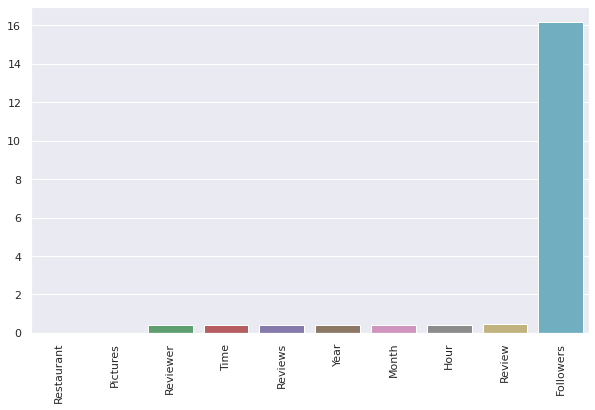

In [34]:
# creating function to find the percentage missing vales 
def percent_missing(df):
    percent_nan = 100* df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

percent_nan = percent_missing(reviews_df)

sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

observation : Followers columns has large number of mising values

(0.0, 1.0)

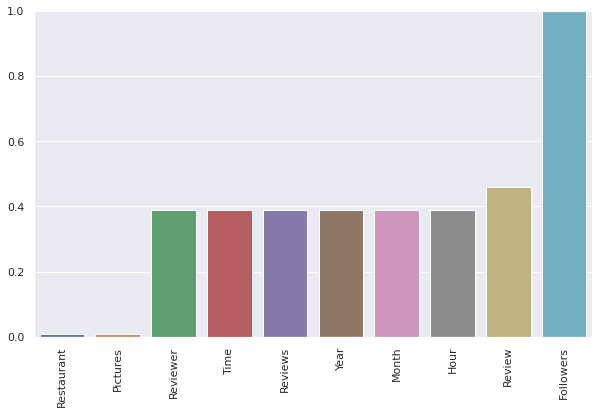

In [35]:
# checking for missing value colums which are less than 1 percent
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);
# Set 1% Threshold
plt.ylim(0,1)

In [36]:
percent_nan[percent_nan < 1]

Restaurant    0.01
Pictures      0.01
Reviewer      0.39
Time          0.39
Reviews       0.39
Year          0.39
Month         0.39
Hour          0.39
Review        0.46
dtype: float64

observation : since most of the column missing percentage is 0.39% so, it quite possible that same row of each column is having null value, if so we can remove those row, lets check it...

In [37]:
# Checking null values observation in Restaurant feature
reviews_df[reviews_df['Restaurant'].isnull()]

Restaurant Reviewer Review  Rating Time  Pictures  Reviews  Followers  \
7601        NaN      NaN    NaN     3.5  NaT       NaN      NaN        NaN   

      Year  Month  Hour  
7601   NaN    NaN   NaN

In [38]:
# Checking null values observation in Pictures feature
reviews_df[reviews_df['Pictures'].isnull()]

Restaurant Reviewer Review  Rating Time  Pictures  Reviews  Followers  \
7601        NaN      NaN    NaN     3.5  NaT       NaN      NaN        NaN   

      Year  Month  Hour  
7601   NaN    NaN   NaN

In [39]:
# Checking null values observation in Reviewer feature
reviews_df[reviews_df['Reviewer'].isnull()]

Restaurant Reviewer Review  Rating Time  Pictures  Reviews  \
7601                  NaN      NaN    NaN     3.5  NaT       NaN      NaN   
8777  American Wild Wings      NaN    NaN     3.5  NaT       0.0      NaN   
8778  American Wild Wings      NaN    NaN     3.5  NaT       0.0      NaN   
8779  American Wild Wings      NaN    NaN     3.5  NaT       0.0      NaN   
8780  American Wild Wings      NaN    NaN     3.5  NaT       0.0      NaN   
8781  American Wild Wings      NaN    NaN     3.5  NaT       0.0      NaN   
8782  American Wild Wings      NaN    NaN     3.5  NaT       0.0      NaN   
8783  American Wild Wings      NaN    NaN     3.5  NaT       0.0      NaN   
8784  American Wild Wings      NaN    NaN     3.5  NaT       0.0      NaN   
8785  American Wild Wings      NaN    NaN     3.5  NaT       0.0      NaN   
8786  American Wild Wings      NaN    NaN     3.5  NaT       0.0      NaN   
8787  American Wild Wings      NaN    NaN     3.5  NaT       0.0      NaN   
8788  American Wild Wings      NaN    NaN     3.5  NaT       0.0      NaN   
8789  American Wild Wings      NaN    NaN     3.5  NaT       0.0      NaN   
8790  American Wild Wings      NaN    NaN     3.5  NaT       0.0      NaN   
8791  American Wild Wings      NaN    NaN     3.5  NaT       0.0      NaN   
8792  American Wild Wings      NaN    NaN     3.5  NaT       0.0      NaN   
8793  American Wild Wings      NaN    NaN     3.5  NaT       0.0      NaN   
8794  American Wild Wings      NaN    NaN     3.5  NaT       0.0      NaN   
8795  American Wild Wings      NaN    NaN     3.5  NaT       0.0      NaN   
8796  American Wild Wings      NaN    NaN     3.5  NaT       0.0      NaN   
8797  American Wild Wings      NaN    NaN     3.5  NaT       0.0      NaN   
8798  American Wild Wings      NaN    NaN     3.5  NaT       0.0      NaN   
8799  American Wild Wings      NaN    NaN     3.5  NaT       0.0      NaN   
9085         Arena Eleven      NaN    NaN     3.5  NaT       0.0      NaN   
9086         Arena Eleven      NaN    NaN     3.5  NaT       0.0      NaN   
9087         Arena Eleven      NaN    NaN     3.5  NaT       0.0      NaN   
9088         Arena Eleven      NaN    NaN     3.5  NaT       0.0      NaN   
9089         Arena Eleven      NaN    NaN     3.5  NaT       0.0      NaN   
9090         Arena Eleven      NaN    NaN     3.5  NaT       0.0      NaN   
9091         Arena Eleven      NaN    NaN     3.5  NaT       0.0      NaN   
9092         Arena Eleven      NaN    NaN     3.5  NaT       0.0      NaN   
9093         Arena Eleven      NaN    NaN     3.5  NaT       0.0      NaN   
9094         Arena Eleven      NaN    NaN     3.5  NaT       0.0      NaN   
9095         Arena Eleven      NaN    NaN     3.5  NaT       0.0      NaN   
9096         Arena Eleven      NaN    NaN     3.5  NaT       0.0      NaN   
9097         Arena Eleven      NaN    NaN     3.5  NaT       0.0      NaN   
9098         Arena Eleven      NaN    NaN     3.5  NaT       0.0      NaN   
9099         Arena Eleven      NaN    NaN     3.5  NaT       0.0      NaN   

      Followers  Year  Month  Hour  
7601        NaN   NaN    NaN   NaN  
8777        NaN   NaN    NaN   NaN  
8778        NaN   NaN    NaN   NaN  
8779        NaN   NaN    NaN   NaN  
8780        NaN   NaN    NaN   NaN  
8781        NaN   NaN    NaN   NaN  
8782        NaN   NaN    NaN   NaN  
8783        NaN   NaN    NaN   NaN  
8784        NaN   NaN    NaN   NaN  
8785        NaN   NaN    NaN   NaN  
8786        NaN   NaN    NaN   NaN  
8787        NaN   NaN    NaN   NaN  
8788        NaN   NaN    NaN   NaN  
8789        NaN   NaN    NaN   NaN  
8790        NaN   NaN    NaN   NaN  
8791        NaN   NaN    NaN   NaN  
8792        NaN   NaN    NaN   NaN  
8793        NaN   NaN    NaN   NaN  
8794        NaN   NaN    NaN   NaN  
8795        NaN   NaN    NaN   NaN  
8796        NaN   NaN    NaN   NaN  
8797        NaN   NaN    NaN   NaN  
8798        NaN   NaN    NaN   NaN  
8799        NaN   NaN    NaN   NaN  
9085     

In [40]:
# Checking null values observation in Followers feature
reviews_df[reviews_df['Followers'].isna()]

Restaurant          Reviewer  \
5      Beyond Flavours     Nagabhavani K   
6      Beyond Flavours   Jamuna Bhuwalka   
7      Beyond Flavours         Sandhya S   
14     Beyond Flavours     Kankaria.ritu   
24     Beyond Flavours     Amritap Datta   
...                ...               ...   
9912  Chinese Pavilion          Anil Rao   
9918  Chinese Pavilion       Ajay Munjal   
9933  Chinese Pavilion   Korak Mukherjee   
9940  Chinese Pavilion     Anubinda Dash   
9948  Chinese Pavilion  Krishna Peddinti   

                                                 Review  Rating  \
5     Ambiance is good, service is good, food is aPr...     5.0   
6     Its a very nice place, ambience is different, ...     5.0   
7     Well after reading so many reviews finally vis...     4.0   
14    We ordered corn cheese balls, manchow soup and...     1.0   
24    Excellent experience, mouthwatering food, good...     5.0   
...                                                 ...     ...   
9912  The tofu with mushrooms was absolutely wonderf...     5.0   
9918  The food is delicious. Service is excellent. I...     5.0   
9933  I was here last night with 2 of my friends. We...     1.0   
9940  The food was amazing. Do not forget to try 'Mo...     4.5   
9948  Some restaurant's have figured their identity....     5.0   

                    Time  Pictures  Reviews  Followers    Year  Month  Hour  
5    2019-05-24 15:22:00       0.0      1.0        NaN  2019.0    5.0  15.0  
6    2019-05-24 01:02:00       0.0      1.0        NaN  2019.0    5.0   1.0  
7    2019-05-23 15:01:00       0.0      1.0        NaN  2019.0    5.0  15.0  
14   2019-05-22 21:19:00       0.0      1.0        NaN  2019.0    5.0  21.0  
24   2019-05-20 23:33:00       0.0      1.0        NaN  2019.0    5.0  23.0  
...                  ...       ...      ...        ...     ...    ...   ...  
9912 2019-04-04 02:15:00       0.0      9.0        NaN  2019.0    4.0   2.0  
9918 2019-02-16 13:56:00       0.0      4.0        NaN  2019.0    2.0  13.0  
9933 2018-05-29 16:02:00       1.0      9.0        NaN  2018.0    5.0  16.0  
9940 2018-03-02 19:54:00      10.0     11.0        NaN  2018.0    3.0  19.0  
9948 2017-10-01 05:21:00       0.0      3.0        NaN  2017.0   10.0   5.0  

[1617 rows x 11 columns]

In [41]:
# finning the nan values of followers by 0
reviews_df['Followers'].fillna(0,inplace=True)

# since all the data is cleaned and the missing data is common for all the features we can drop them all
reviews_df.dropna(inplace=True)

# checking null values in the data set 
reviews_df.isnull().sum()

Restaurant    0
Reviewer      0
Review        0
Rating        0
Time          0
Pictures      0
Reviews       0
Followers     0
Year          0
Month         0
Hour          0
dtype: int64

#EDA

# **META DATA**

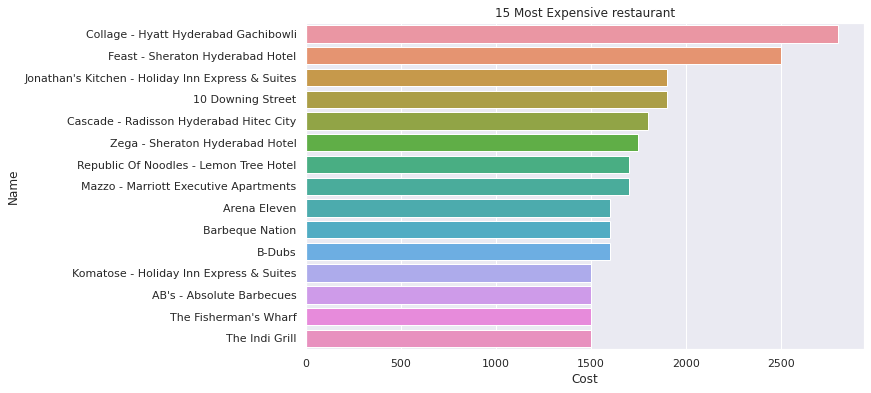

In [42]:
# checking for most expensive Restaurant
sns.barplot(x='Cost',
            y="Name", 
            data=meta_df, 
            order=meta_df.sort_values('Cost',ascending=False).Name[:15])

plt.title('15 Most Expensive restaurant')
plt.show()

(-0.5, 1399.5, 1399.5, -0.5)

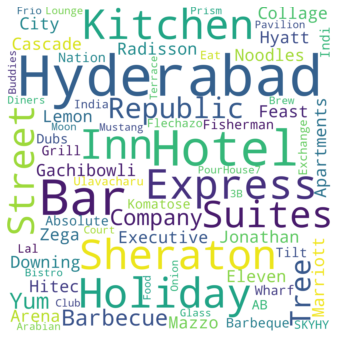

In [43]:
#Creating the text variable

text = " ".join(name for name in meta_df.sort_values('Cost',ascending=False).Name[:30])


# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 1400, height = 1400,collocations = False, background_color = 'white').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off")

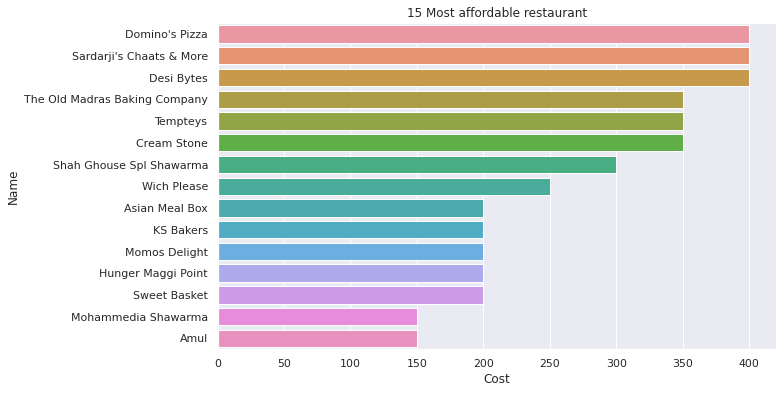

In [44]:
# checking for most affordable Restaurant
sns.barplot(x='Cost',
            y="Name", 
            data=meta_df, 
            order=meta_df.sort_values('Cost',ascending=False).Name[-15:])

plt.title('15 Most affordable restaurant')
plt.show()

(-0.5, 1399.5, 1399.5, -0.5)

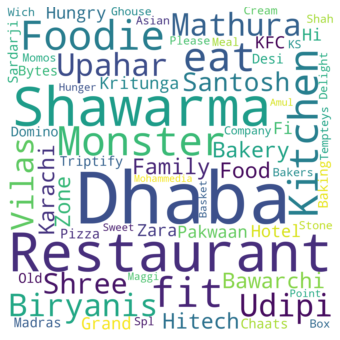

In [45]:
#Creating the text variable

text = " ".join(name for name in meta_df.sort_values('Cost',ascending=False).Name[-30:])


# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 1400, height = 1400,collocations = False, background_color = 'white').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off")

In [46]:
# lets find the most cusines offered by Restaurants
meta_df.Cuisines

0      Chinese, Continental, Kebab, European, South I...
1                         Biryani, North Indian, Chinese
2           Asian, Mediterranean, North Indian, Desserts
3      Biryani, North Indian, Chinese, Seafood, Bever...
4      Asian, Continental, North Indian, Chinese, Med...
                             ...                        
100                                     Fast Food, Salad
101                                       Bakery, Mithai
102                       North Indian, Biryani, Chinese
103                                            Fast Food
104                      Thai, Asian, Chinese, Malaysian
Name: Cuisines, Length: 105, dtype: object

In [47]:
# spliting the cusines and storing in list 
cuisine_list=meta_df.Cuisines.str.split(', ')
cuisine_list

0      [Chinese, Continental, Kebab, European, South ...
1                       [Biryani, North Indian, Chinese]
2         [Asian, Mediterranean, North Indian, Desserts]
3      [Biryani, North Indian, Chinese, Seafood, Beve...
4      [Asian, Continental, North Indian, Chinese, Me...
                             ...                        
100                                   [Fast Food, Salad]
101                                     [Bakery, Mithai]
102                     [North Indian, Biryani, Chinese]
103                                          [Fast Food]
104                    [Thai, Asian, Chinese, Malaysian]
Name: Cuisines, Length: 105, dtype: object

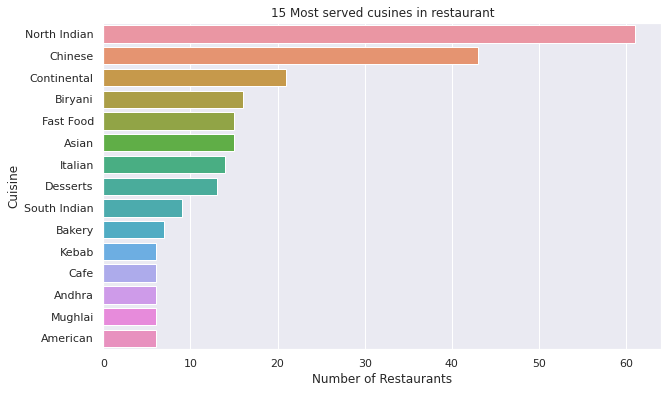

In [48]:
# storing all the cusines in a dict 
cuis_dict = {}
for names in cuisine_list:
    for name in names:
        if (name in cuis_dict):
            cuis_dict[name]+=1
        else:  
            cuis_dict[name]=1

# converting the dict to a data frame 
cuis_df=pd.DataFrame.from_dict([cuis_dict]).transpose().reset_index().rename(columns={'index':'Cuisine',0:'Number of Restaurants'})

# graph for most cusines served in restaurant
sns.barplot(y='Cuisine',
            x="Number of Restaurants", 
            data=cuis_df, 
            order=cuis_df.sort_values('Number of Restaurants',ascending=False).Cuisine[:15])
plt.title('15 Most served cusines in restaurant')
plt.show()



In [49]:
cuisine_list

0      [Chinese, Continental, Kebab, European, South ...
1                       [Biryani, North Indian, Chinese]
2         [Asian, Mediterranean, North Indian, Desserts]
3      [Biryani, North Indian, Chinese, Seafood, Beve...
4      [Asian, Continental, North Indian, Chinese, Me...
                             ...                        
100                                   [Fast Food, Salad]
101                                     [Bakery, Mithai]
102                     [North Indian, Biryani, Chinese]
103                                          [Fast Food]
104                    [Thai, Asian, Chinese, Malaysian]
Name: Cuisines, Length: 105, dtype: object

(-0.5, 1399.5, 1399.5, -0.5)

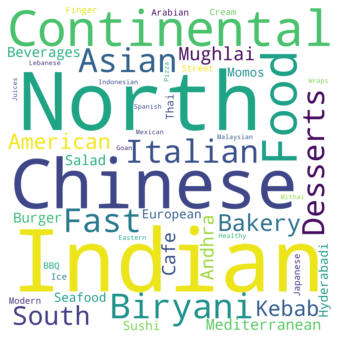

In [50]:
#Creating the text variable

text = " ".join(name for name in meta_df.Cuisines )


# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 1400, height = 1400,collocations = False, background_color = 'white').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off")

In [51]:
# spliting the cusines and storing in list 
Collections_list=meta_df.Collections.dropna().str.split(', ')
Collections_list

0      [Food Hygiene Rated Restaurants in Hyderabad, ...
1                                  [Hyderabad's Hottest]
2                   [Great Buffets, Hyderabad's Hottest]
3                               [Late Night Restaurants]
4      [Best Bars & Pubs, Food Hygiene Rated Restaura...
5      [Sunday Brunches, Corporate Favorites, Great B...
6          [Food Hygiene Rated Restaurants in Hyderabad]
8      [Great Buffets, Live Sports Screenings, Best B...
9                                      [Frozen Delights]
10       [Street Food, Veggie Friendly, Pocket Friendly]
11                                    [Barbecue & Grill]
12                                       [Great Buffets]
13     [Corporate Favorites, Happy Hours, Live Sports...
14     [Barbecue & Grill, Great Buffets, Corporate Fa...
18                                  [Trending This Week]
19                                  [Trending This Week]
20                                     [Veggie Friendly]
21                      [Great 

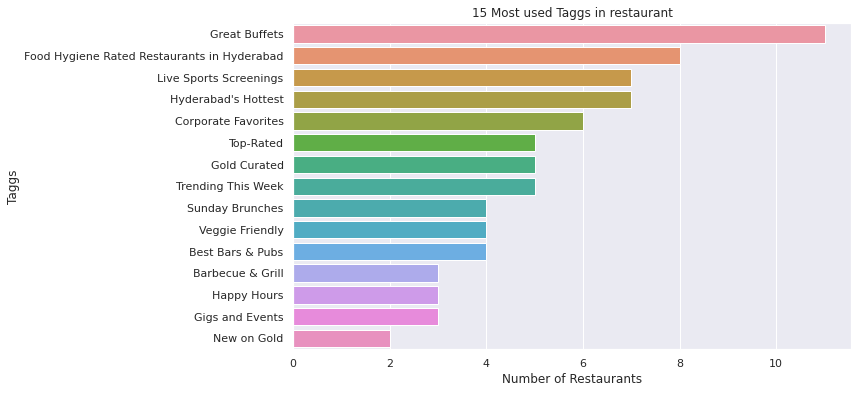

In [52]:
# storing all the cusines in a dict 
Collections_dict = {}
for names in Collections_list:
    for name in names:
        if (name in Collections_dict):
            Collections_dict[name]+=1
        else:  
            Collections_dict[name]=1

# converting the dict to a data frame 
Collections_df=pd.DataFrame.from_dict([Collections_dict]).transpose().reset_index().rename(columns={'index':'Taggs',0:'Number of Restaurants'})

# graph for most cusines served in restaurant
sns.barplot(y='Taggs',
            x="Number of Restaurants", 
            data=Collections_df, 
            order=Collections_df.sort_values('Number of Restaurants',ascending=False).Taggs[:15])
plt.title('15 Most used Taggs in restaurant')
plt.show()

(-0.5, 1399.5, 1399.5, -0.5)

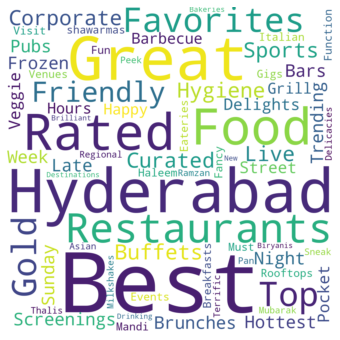

In [53]:
#Creating the text variable

text = " ".join(name for name in Collections_df.Taggs )


# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 1400, height = 1400,collocations = False, background_color = 'white').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off")

# Reviews

In [54]:
reviews_df.head()

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review  Rating  \
0  The ambience was good, food was quite good . h...     5.0   
1  Ambience is too good for a pleasant evening. S...     5.0   
2  A must try.. great food great ambience. Thnx f...     5.0   
3  Soumen das and Arun was a great guy. Only beca...     5.0   
4  Food is good.we ordered Kodi drumsticks and ba...     5.0   

                 Time  Pictures  Reviews  Followers    Year  Month  Hour  
0 2019-05-25 15:54:00       0.0      1.0        2.0  2019.0    5.0  15.0  
1 2019-05-25 14:20:00       0.0      3.0        2.0  2019.0    5.0  14.0  
2 2019-05-24 22:54:00       0.0      2.0        3.0  2019.0    5.0  22.0  
3 2019-05-24 22:11:00       0.0      1.0        1.0  2019.0    5.0  22.0  
4 2019-05-24 21:37:00       0.0      3.0        2.0  2019.0    5.0  21.0

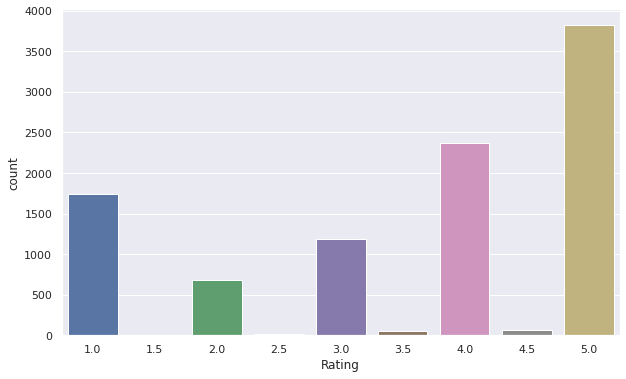

In [55]:
sns.countplot(reviews_df.Rating)

lets find the restaurant with best reviews

In [56]:
reviews_df

Restaurant              Reviewer  \
0      Beyond Flavours     Rusha Chakraborty   
1      Beyond Flavours  Anusha Tirumalaneedi   
2      Beyond Flavours       Ashok Shekhawat   
3      Beyond Flavours        Swapnil Sarkar   
4      Beyond Flavours                Dileep   
...                ...                   ...   
9995  Chinese Pavilion      Abhishek Mahajan   
9996  Chinese Pavilion        Sharad Agrawal   
9997  Chinese Pavilion             Ramandeep   
9998  Chinese Pavilion       Nayana Shanbhag   
9999  Chinese Pavilion      Bhargava Krishna   

                                                 Review  Rating  \
0     The ambience was good, food was quite good . h...     5.0   
1     Ambience is too good for a pleasant evening. S...     5.0   
2     A must try.. great food great ambience. Thnx f...     5.0   
3     Soumen das and Arun was a great guy. Only beca...     5.0   
4     Food is good.we ordered Kodi drumsticks and ba...     5.0   
...                                                 ...     ...   
9995  Madhumathi Mahajan Well to start with nice cou...     3.0   
9996  This place has never disappointed us.. The foo...     4.5   
9997  Bad rating is mainly because of "Chicken Bone ...     1.5   
9998  I personally love and prefer Chinese Food. Had...     4.0   
9999  Checked in here to try some delicious chinese ...     3.5   

                    Time  Pictures  Reviews  Followers    Year  Month  Hour  
0    2019-05-25 15:54:00       0.0      1.0        2.0  2019.0    5.0  15.0  
1    2019-05-25 14:20:00       0.0      3.0        2.0  2019.0    5.0  14.0  
2    2019-05-24 22:54:00       0.0      2.0        3.0  2019.0    5.0  22.0  
3    2019-05-24 22:11:00       0.0      1.0        1.0  2019.0    5.0  22.0  
4    2019-05-24 21:37:00       0.0      3.0        2.0  2019.0    5.0  21.0  
...                  ...       ...      ...        ...     ...    ...   ...  
9995 2016-06-05 00:08:00       0.0     53.0       54.0  2016.0    6.0   0.0  
9996 2016-06-04 22:01:00       0.0      2.0       53.0  2016.0    6.0  22.0  
9997 2016-06-03 10:37:00       3.0     65.0      423.0  2016.0    6.0  10.0  
9998 2016-05-31 17:22:00       0.0     13.0      144.0  2016.0    5.0  17.0  
9999 2016-05-31 16:41:00       6.0    472.0     1302.0  2016.0    5.0  16.0  

[9954 rows x 11 columns]

In [57]:
df_rating = reviews_df.groupby(['Restaurant']).agg({'Rating':'mean','Restaurant':'count'}).rename(columns={'Restaurant':'number_of_rating'}).reset_index()
df_rating.describe()

Rating  number_of_rating
count  100.000000         100.00000
mean     3.601891          99.54000
std      0.508100           2.73924
min      2.400000          77.00000
25%      3.245000         100.00000
50%      3.613081         100.00000
75%      3.846250         100.00000
max      4.880000         100.00000

looks like we got 100 rating for all the restaurants

Text(0.5, 1.0, 'Top 10 Restaurants by Rating')

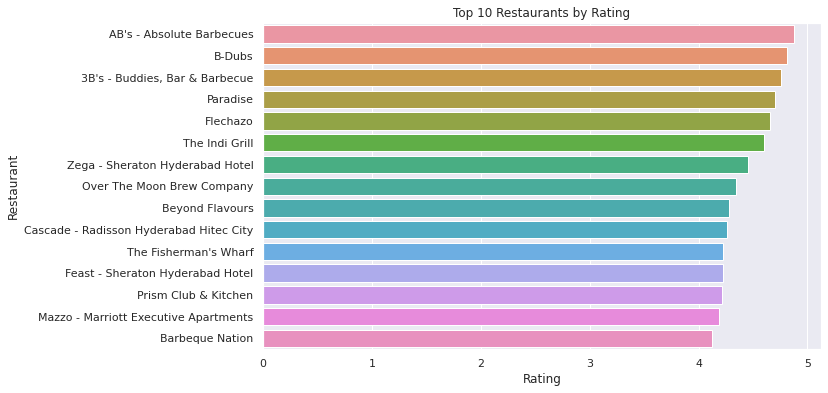

In [58]:
sns.barplot(data=df_rating, x='Rating', y='Restaurant', order=df_rating.sort_values('Rating',ascending=False).Restaurant[:15])
plt.title('Top 10 Restaurants by Rating')

In [59]:
df_Reviewer = reviews_df.groupby(['Reviewer']).agg({'Reviews':'sum','Followers':'sum','Rating':'mean'}).reset_index()
most_famous_reviewer=df_Reviewer[(df_Reviewer['Followers'] > 10000)&(df_Reviewer['Reviews']>100)&(df_Reviewer['Rating']>3.5)]
most_famous_reviewer

Reviewer  Reviews  Followers    Rating
56       Aanchal Khemka    945.0    11605.0  3.600000
903           Asad Rana   1086.0    12306.0  3.666667
1019          Avin Seth   1576.0    11064.0  4.500000
1285   Buddiga Sindhuri    300.0    10033.0  4.200000
1768        Food Nawabs    520.0    22129.0  4.000000
1786  Foodies Hyderabad    124.0    37976.0  4.500000
2173        Hungry Eyes    208.0    10258.0  5.000000
2816       Kunal Khanra    756.0    11440.0  4.750000
3480      Namit Agarwal   1253.0    13139.0  3.857143
4496      Rajat Goel ✳️    444.0    10149.0  4.000000
4902        Rohit Reddy    495.0    14860.0  3.900000
5460    Satwinder Singh    558.0    40230.0  3.666667
5780   Shravya Gunipudi   1544.0    10184.0  4.062500
5799   Shreyoshi Mandal   1085.0    12618.0  3.571429
6225           Srinivas    144.0    30514.0  3.714286
6744    Teja Dandigunta    432.0    10136.0  4.000000

In [60]:
df_Reviewer.describe([0.90])

Reviews     Followers       Rating
count  7442.000000   7442.000000  7442.000000
mean     32.111664    218.183284     3.578302
std     114.700948   1222.190701     1.502574
min       0.000000      0.000000     1.000000
50%       3.000000      4.000000     4.000000
90%      67.000000    266.900000     5.000000
max    3093.000000  40230.000000     5.000000

Text(0.5, 1.0, 'Top 15 Reviewers by no of reviews')

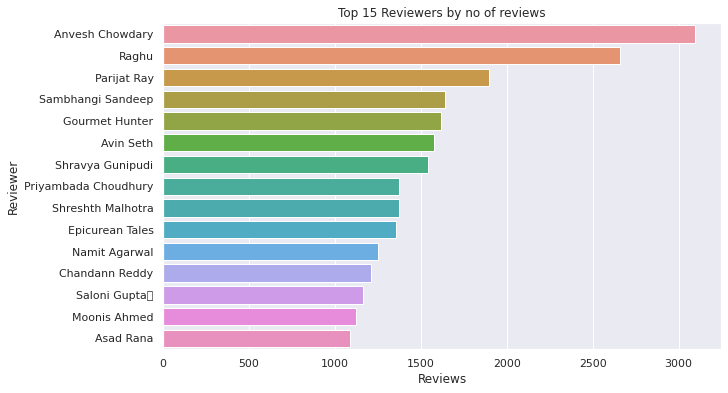

In [61]:
sns.barplot(data=df_Reviewer, x='Reviews', y='Reviewer', order=df_Reviewer.sort_values('Reviews',ascending=False).Reviewer[:15])
plt.title('Top 15 Reviewers by no of reviews')

Text(0.5, 1.0, 'Top 15 Reviewers by no of Followers')

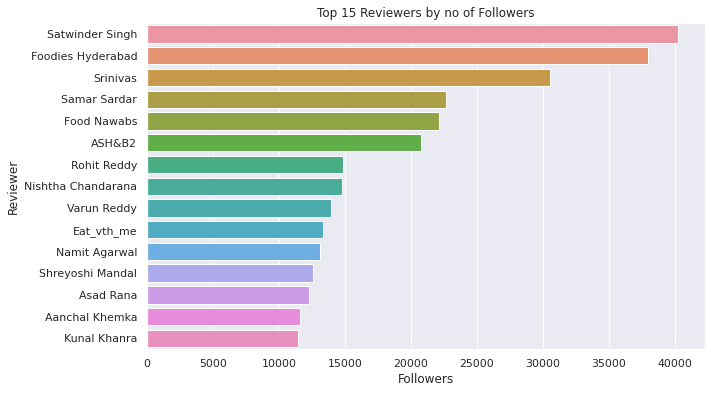

In [62]:
sns.barplot(data=df_Reviewer, x='Followers', y='Reviewer', order=df_Reviewer.sort_values('Followers',ascending=False).Reviewer[:15])
plt.title('Top 15 Reviewers by no of Followers')

Text(0.5, 1.0, 'Top reviewers to focus on')

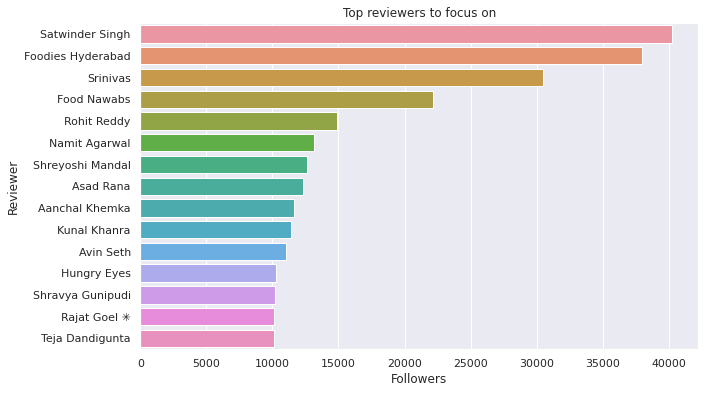

In [63]:
most_famous_reviewer
sns.barplot(data=most_famous_reviewer, x='Followers', y='Reviewer', order=most_famous_reviewer.sort_values('Followers',ascending=False).Reviewer[:15])
plt.title('Top reviewers to focus on')

these are the reviewer a restaurant should focus on who have reviewed more than 100 restaurants and have followers greater than 10000 with an average rating above 3.5

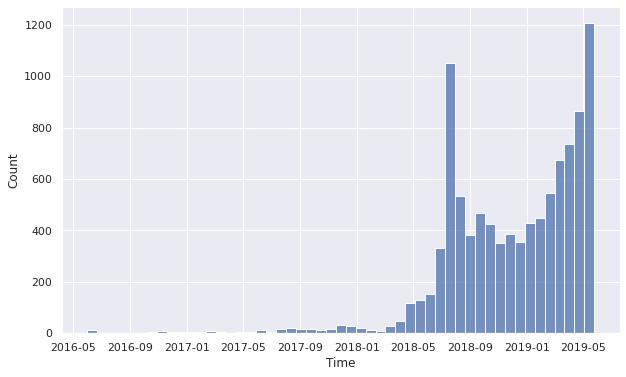

In [64]:
sns.histplot(reviews_df.Time)

looks like most of people started reviewing restaurant after may 2018

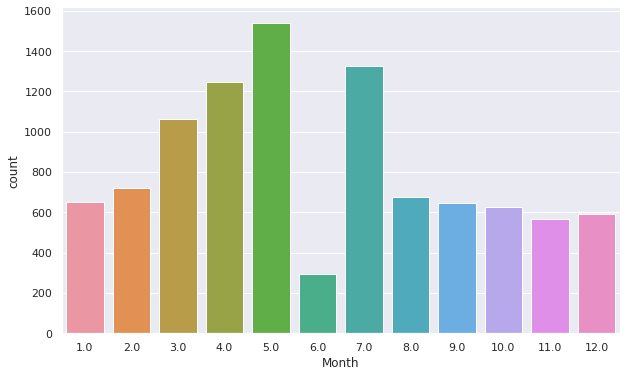

In [65]:
sns.countplot(reviews_df.Month)

*most of the reviews are in the month of 5 and 7 month of year bold text

#Text Pre-processing

In [66]:
# storing reviews in a variable for data processing
reviews=reviews_df.Review
reviews

0       The ambience was good, food was quite good . h...
1       Ambience is too good for a pleasant evening. S...
2       A must try.. great food great ambience. Thnx f...
3       Soumen das and Arun was a great guy. Only beca...
4       Food is good.we ordered Kodi drumsticks and ba...
                              ...                        
9995    Madhumathi Mahajan Well to start with nice cou...
9996    This place has never disappointed us.. The foo...
9997    Bad rating is mainly because of "Chicken Bone ...
9998    I personally love and prefer Chinese Food. Had...
9999    Checked in here to try some delicious chinese ...
Name: Review, Length: 9954, dtype: object

In [67]:
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 287 kB 4.3 MB/s 
     |████████████████████████████████| 106 kB 42.6 MB/s 


In [68]:
# functions for text preprocessing 
def lower_case(text):
  '''convert the string in lower case 
  '''
  text=[x.lower() for x in text]
  return text

import string
def remove_punctuation (text):
  '''remove punctuation from the the list of strings
  '''
  text = [''.join(c for c in s if c not in string.punctuation) for s in text]
  return text

import re
regex = re.compile('[^a-zA-Z]')
def remove_non_leters(text):
  '''used to remove all non leters form the list 
  '''
  text=[regex.sub(' ', x) for x in text]
  return text

def remove_all_extra_spaces (text):
  '''removes all extra space from the text
  '''
  for index,x in enumerate(text):
    text[index]=" ".join(x.split())
  return text
  
import string
ascii_chars = set(string.printable)  # speeds things up
def remove_non_ascii_prinatble_from_list(list_of_words):
  '''removes non ascii charaters from text
  '''
  return [word for word in list_of_words 
            if all(char in ascii_chars for char in word)]

import contractions
def remove_contrations(text):
  '''shotents the words form 
  '''
  for index,x in enumerate(text):
    text[index] = contractions.fix(x)
  return text

def lemmatization_(text):
  '''converting to root words
  '''
  for index,x in enumerate(text):
    doc = nlp(x)  
    l=list()
    for word in doc:
        l.append(word.lemma_)
    text[index]=' '.join(l)

  return text
  

def Change_text(msg):
  '''Removing StopWord
  '''
  main_text=[word for word in no_punc.split() if word.lower() not in stop_list]
  return ' '.join(main_text)

def remove_stop_words (text):
  test_2=[]
  for x in reviews:
    test_1=[]
    for i in x.split(' '):
      if i not in stop_word_list:
        test_1.append(i)
    test_2.append(' '.join(test_1))
  return test_2

In [69]:
#download small spacy model
!python -m spacy download en_core_web_sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.8 MB 5.3 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [70]:
import spacy
nlp = spacy.load('en_core_web_sm')
# Print the set of spaCy's default stop words and adding common words of data set
print(nlp.Defaults.stop_words)
print(nlp.vocab['-PRON-'].is_stop)

{'yourselves', 'now', 'since', 'thereby', 'where', 'not', 'off', 'those', 'towards', 'becoming', 'has', 'wherever', 'again', 'being', 'between', 'onto', 'formerly', 'during', 'part', 'together', 'thereafter', '‘ve', 'none', 'although', 'mostly', 'nowhere', 'more', 'other', 'me', 'ours', 'ourselves', 'go', 'all', 'seeming', 'four', 'have', 'however', 'a', 'through', 'on', 'mine', '‘d', 'twelve', 'next', 'does', 'thence', 'upon', 'hereby', 'be', 'often', 'six', '’s', 'made', 'alone', 'across', '‘s', 'our', 'n‘t', 'others', 'both', 'someone', 'might', 'except', 'seems', 'for', 'back', 'became', 'whatever', 'him', 'themselves', 'side', '’re', 'whereupon', 'am', 'used', 'forty', 'one', "'s", 'still', 'do', 'moreover', 'over', 'enough', 'somewhere', 'within', 'beforehand', 'n’t', 'fifteen', 'yourself', 'perhaps', 'this', 'elsewhere', 'take', 'several', 'into', 'anyone', 'must', 'whereas', 'if', 'itself', 'own', 'another', 'nobody', 'whenever', 'are', 'whither', 'had', 'why', 'full', 'show', 

In [71]:
# Add the word to the set of stop words. Use lowercase!
nlp.Defaults.stop_words.add('-PRON-')

# Set the stop_word tag on the lexeme
nlp.vocab['-PRON-'].is_stop = True

# Add the word to the set of stop words. Use lowercase!
nlp.Defaults.stop_words.add('pron')

# Set the stop_word tag on the lexeme
nlp.vocab['-PRON-'].is_stop = True

# storing nlp stop wors in a list
stop_word_list=list(nlp.Defaults.stop_words)
stop_word_list

['yourselves',
 'now',
 'since',
 'thereby',
 'where',
 'not',
 'off',
 'those',
 'towards',
 'becoming',
 'has',
 'wherever',
 'again',
 'being',
 'between',
 'onto',
 'formerly',
 'during',
 'part',
 'together',
 'thereafter',
 '‘ve',
 'none',
 'although',
 'mostly',
 'nowhere',
 'more',
 'other',
 'me',
 'ours',
 'ourselves',
 '-PRON-',
 'go',
 'all',
 'seeming',
 'four',
 'have',
 'however',
 'a',
 'through',
 'on',
 'mine',
 '‘d',
 'twelve',
 'next',
 'does',
 'thence',
 'upon',
 'hereby',
 'be',
 'often',
 'six',
 '’s',
 'made',
 'alone',
 'across',
 '‘s',
 'our',
 'n‘t',
 'others',
 'both',
 'someone',
 'pron',
 'might',
 'except',
 'seems',
 'for',
 'back',
 'became',
 'whatever',
 'him',
 'themselves',
 'side',
 '’re',
 'whereupon',
 'am',
 'used',
 'forty',
 'one',
 "'s",
 'still',
 'do',
 'moreover',
 'over',
 'enough',
 'somewhere',
 'within',
 'beforehand',
 'n’t',
 'fifteen',
 'yourself',
 'perhaps',
 'this',
 'elsewhere',
 'take',
 'several',
 'into',
 'anyone',
 'must',

In [72]:
'''
convert the string in lower case, remove punctuation, non leters(numbers, emoji etc), 
extra spaces, and non ascii characters, lemmatization and removing stop words
'''
reviews=lower_case(reviews)
reviews=remove_punctuation(reviews)
reviews=remove_non_leters(reviews)
reviews=remove_all_extra_spaces(reviews)
reviews=remove_non_ascii_prinatble_from_list(reviews)
reviews=remove_contrations(reviews)
reviews=lemmatization_(reviews)
reviews=remove_stop_words(reviews)

In [73]:
all_words=' '.join(reviews)
all_words

'ambience good food good saturday lunch cost effective good place sate brunch chill friend parent waiter souman das courteous helpful ambience good pleasant evening service prompt food good good experience soumen das kudo service try great food great ambience thnx service pradeep subroto personal recommendation penne alfredo pasta music background amazing soumen das arun great guy behavior sincerety good food course I like visit place food goodwe order kodi drumstick basket mutton biryani good thank pradeep serve enjoy ambience good ambiance good service good food apradeecp subro good service food good papiya good hostess caption good star restaurant nice place ambience different food order tasty service gud worth visit reasonable visit place read review finally visit placeambience good come food crispy corn nice tawa fish ok basket biryani disappoint biryani ok flatter claim staff polite prompt especially pradeep suman excellent food specially like spicy food courteous staff shubro pr

In [74]:
reviews

['ambience good food good saturday lunch cost effective good place sate brunch chill friend parent waiter souman das courteous helpful',
 'ambience good pleasant evening service prompt food good good experience soumen das kudo service',
 'try great food great ambience thnx service pradeep subroto personal recommendation penne alfredo pasta music background amazing',
 'soumen das arun great guy behavior sincerety good food course I like visit place',
 'food goodwe order kodi drumstick basket mutton biryani good thank pradeep serve enjoy ambience good',
 'ambiance good service good food apradeecp subro good service food good papiya good hostess caption good star restaurant',
 'nice place ambience different food order tasty service gud worth visit reasonable visit place',
 'read review finally visit placeambience good come food crispy corn nice tawa fish ok basket biryani disappoint biryani ok flatter claim staff polite prompt especially pradeep suman',
 'excellent food specially like spi

In [75]:
# storing the reviews in a feature of df
reviews_df['Reviews']=reviews
reviews_df.head()

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review  Rating  \
0  The ambience was good, food was quite good . h...     5.0   
1  Ambience is too good for a pleasant evening. S...     5.0   
2  A must try.. great food great ambience. Thnx f...     5.0   
3  Soumen das and Arun was a great guy. Only beca...     5.0   
4  Food is good.we ordered Kodi drumsticks and ba...     5.0   

                 Time  Pictures  \
0 2019-05-25 15:54:00       0.0   
1 2019-05-25 14:20:00       0.0   
2 2019-05-24 22:54:00       0.0   
3 2019-05-24 22:11:00       0.0   
4 2019-05-24 21:37:00       0.0   

                                             Reviews  Followers    Year  \
0  ambience good food good saturday lunch cost ef...        2.0  2019.0   
1  ambience good pleasant evening service prompt ...        2.0  2019.0   
2  try great food great ambience thnx service pra...        3.0  2019.0   
3  soumen das arun great guy behavior sincerety g...        1.0  2019.0   
4  food goodwe order kodi drumstick basket mutton...        2.0  2019.0   

   Month  Hour  
0    5.0  15.0  
1    5.0  14.0  
2    5.0  22.0  
3    5.0  22.0  
4    5.0  21.0

In [76]:
#function to removing words greater than 45 and less than 2
def len_less_than2(review):
  review=" ".join([i for i in review.split() if len(i)>2])
  review=" ".join([i for i in review.split() if len(i)<=45])
  return review

In [77]:
#removing words greater than 45 and less than 2
reviews_df['Reviews']=reviews_df['Reviews'].apply(lambda x:len_less_than2(x))

In [78]:
reviews_df

Restaurant              Reviewer  \
0      Beyond Flavours     Rusha Chakraborty   
1      Beyond Flavours  Anusha Tirumalaneedi   
2      Beyond Flavours       Ashok Shekhawat   
3      Beyond Flavours        Swapnil Sarkar   
4      Beyond Flavours                Dileep   
...                ...                   ...   
9995  Chinese Pavilion      Abhishek Mahajan   
9996  Chinese Pavilion        Sharad Agrawal   
9997  Chinese Pavilion             Ramandeep   
9998  Chinese Pavilion       Nayana Shanbhag   
9999  Chinese Pavilion      Bhargava Krishna   

                                                 Review  Rating  \
0     The ambience was good, food was quite good . h...     5.0   
1     Ambience is too good for a pleasant evening. S...     5.0   
2     A must try.. great food great ambience. Thnx f...     5.0   
3     Soumen das and Arun was a great guy. Only beca...     5.0   
4     Food is good.we ordered Kodi drumsticks and ba...     5.0   
...                                                 ...     ...   
9995  Madhumathi Mahajan Well to start with nice cou...     3.0   
9996  This place has never disappointed us.. The foo...     4.5   
9997  Bad rating is mainly because of "Chicken Bone ...     1.5   
9998  I personally love and prefer Chinese Food. Had...     4.0   
9999  Checked in here to try some delicious chinese ...     3.5   

                    Time  Pictures  \
0    2019-05-25 15:54:00       0.0   
1    2019-05-25 14:20:00       0.0   
2    2019-05-24 22:54:00       0.0   
3    2019-05-24 22:11:00       0.0   
4    2019-05-24 21:37:00       0.0   
...                  ...       ...   
9995 2016-06-05 00:08:00       0.0   
9996 2016-06-04 22:01:00       0.0   
9997 2016-06-03 10:37:00       3.0   
9998 2016-05-31 17:22:00       0.0   
9999 2016-05-31 16:41:00       6.0   

                                                Reviews  Followers    Year  \
0     ambience good food good saturday lunch cost ef...        2.0  2019.0   
1     ambience good pleasant evening service prompt ...        2.0  2019.0   
2     try great food great ambience thnx service pra...        3.0  2019.0   
3     soumen das arun great guy behavior sincerety g...        1.0  2019.0   
4     food goodwe order kodi drumstick basket mutton...        2.0  2019.0   
...                                                 ...        ...     ...   
9995  madhumathi mahajan start nice courteous server...       54.0  2016.0   
9996  place disappoint food courteous staff serene a...       53.0  2016.0   
9997  bad rating mainly chicken bone find veg food a...      423.0  2016.0   
9998  personally love prefer chinese food couple tim...      144.0  2016.0   
9999  check try delicious chinese food nonveg lunche...     1302.0  2016.0   

      Month  Hour  
0       5.0  15.0  
1       5.0  14.0  
2       5.0  22.0  
3       5.0  22.0  
4       5.0  21.0  
...     ...   ...  
9995    6.0   0.0  
9996    6.0  22.0  
9997    6.0  10.0  
9998    5.0  17.0  
9999    5.0  16.0  

[9954 rows x 11 columns]

In [79]:
# droping the unview column
reviews_df=reviews_df.drop('Review',axis=1)

reviews_df

Restaurant              Reviewer  Rating                Time  \
0      Beyond Flavours     Rusha Chakraborty     5.0 2019-05-25 15:54:00   
1      Beyond Flavours  Anusha Tirumalaneedi     5.0 2019-05-25 14:20:00   
2      Beyond Flavours       Ashok Shekhawat     5.0 2019-05-24 22:54:00   
3      Beyond Flavours        Swapnil Sarkar     5.0 2019-05-24 22:11:00   
4      Beyond Flavours                Dileep     5.0 2019-05-24 21:37:00   
...                ...                   ...     ...                 ...   
9995  Chinese Pavilion      Abhishek Mahajan     3.0 2016-06-05 00:08:00   
9996  Chinese Pavilion        Sharad Agrawal     4.5 2016-06-04 22:01:00   
9997  Chinese Pavilion             Ramandeep     1.5 2016-06-03 10:37:00   
9998  Chinese Pavilion       Nayana Shanbhag     4.0 2016-05-31 17:22:00   
9999  Chinese Pavilion      Bhargava Krishna     3.5 2016-05-31 16:41:00   

      Pictures                                            Reviews  Followers  \
0          0.0  ambience good food good saturday lunch cost ef...        2.0   
1          0.0  ambience good pleasant evening service prompt ...        2.0   
2          0.0  try great food great ambience thnx service pra...        3.0   
3          0.0  soumen das arun great guy behavior sincerety g...        1.0   
4          0.0  food goodwe order kodi drumstick basket mutton...        2.0   
...        ...                                                ...        ...   
9995       0.0  madhumathi mahajan start nice courteous server...       54.0   
9996       0.0  place disappoint food courteous staff serene a...       53.0   
9997       3.0  bad rating mainly chicken bone find veg food a...      423.0   
9998       0.0  personally love prefer chinese food couple tim...      144.0   
9999       6.0  check try delicious chinese food nonveg lunche...     1302.0   

        Year  Month  Hour  
0     2019.0    5.0  15.0  
1     2019.0    5.0  14.0  
2     2019.0    5.0  22.0  
3     2019.0    5.0  22.0  
4     2019.0    5.0  21.0  
...      ...    ...   ...  
9995  2016.0    6.0   0.0  
9996  2016.0    6.0  22.0  
9997  2016.0    6.0  10.0  
9998  2016.0    5.0  17.0  
9999  2016.0    5.0  16.0  

[9954 rows x 10 columns]

# Performing Clustering

In [80]:
meta_df.head()

Name  \
0                 Beyond Flavours   
1                        Paradise   
2                        Flechazo   
3  Shah Ghouse Hotel & Restaurant   
4      Over The Moon Brew Company   

                                               Links  Cost  \
0  https://www.zomato.com/hyderabad/beyond-flavou...   800   
1  https://www.zomato.com/hyderabad/paradise-gach...   800   
2  https://www.zomato.com/hyderabad/flechazo-gach...  1300   
3  https://www.zomato.com/hyderabad/shah-ghouse-h...   800   
4  https://www.zomato.com/hyderabad/over-the-moon...  1200   

                                         Collections  \
0  Food Hygiene Rated Restaurants in Hyderabad, C...   
1                                Hyderabad's Hottest   
2                 Great Buffets, Hyderabad's Hottest   
3                             Late Night Restaurants   
4  Best Bars & Pubs, Food Hygiene Rated Restauran...   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   
1                     Biryani, North Indian, Chinese   
2       Asian, Mediterranean, North Indian, Desserts   
3  Biryani, North Indian, Chinese, Seafood, Bever...   
4  Asian, Continental, North Indian, Chinese, Med...   

                                             Timings  
0      12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  
1                                     11 AM to 11 PM  
2              11:30 AM to 4:30 PM, 6:30 PM to 11 PM  
3                                    12 Noon to 2 AM  
4  12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...

In [81]:
# converting the cuisines to lower case
meta_df['Cuisines'] = meta_df['Cuisines'].apply(lambda x : x.lower())

cuisine_df=meta_df.loc[:,['Name','Cost','Cuisines']]

In [82]:
cuisine_df.head()

Name  Cost  \
0                 Beyond Flavours   800   
1                        Paradise   800   
2                        Flechazo  1300   
3  Shah Ghouse Hotel & Restaurant   800   
4      Over The Moon Brew Company  1200   

                                            Cuisines  
0  chinese, continental, kebab, european, south i...  
1                     biryani, north indian, chinese  
2       asian, mediterranean, north indian, desserts  
3  biryani, north indian, chinese, seafood, bever...  
4  asian, continental, north indian, chinese, med...

In [83]:
# spliting the cuisine and storing in list 
def cuisine_list(cuisines):
   all_cuisines = list(set(cuisines.split(', ')))
   return all_cuisines

cuisine_df['cuisine']=cuisine_df['Cuisines'].apply(lambda x : cuisine_list(x))

In [84]:
cuisine_df.head()

Name  Cost  \
0                 Beyond Flavours   800   
1                        Paradise   800   
2                        Flechazo  1300   
3  Shah Ghouse Hotel & Restaurant   800   
4      Over The Moon Brew Company  1200   

                                            Cuisines  \
0  chinese, continental, kebab, european, south i...   
1                     biryani, north indian, chinese   
2       asian, mediterranean, north indian, desserts   
3  biryani, north indian, chinese, seafood, bever...   
4  asian, continental, north indian, chinese, med...   

                                             cuisine  
0  [european, south indian, chinese, kebab, north...  
1                   [chinese, biryani, north indian]  
2     [mediterranean, desserts, asian, north indian]  
3  [seafood, chinese, north indian, biryani, beve...  
4  [mediterranean, chinese, asian, north indian, ...

In [85]:
# Transform each element of a list-like to a row 
cuisine_df=cuisine_df.explode('cuisine')
cuisine_df.head()

Name  Cost                                           Cuisines  \
0  Beyond Flavours   800  chinese, continental, kebab, european, south i...   
0  Beyond Flavours   800  chinese, continental, kebab, european, south i...   
0  Beyond Flavours   800  chinese, continental, kebab, european, south i...   
0  Beyond Flavours   800  chinese, continental, kebab, european, south i...   
0  Beyond Flavours   800  chinese, continental, kebab, european, south i...   

        cuisine  
0      european  
0  south indian  
0       chinese  
0         kebab  
0  north indian

In [86]:
# checking unique values of cuisine
set(cuisine_df["cuisine"])

{'american',
 'andhra',
 'arabian',
 'asian',
 'bakery',
 'bbq',
 'beverages',
 'biryani',
 'burger',
 'cafe',
 'chinese',
 'continental',
 'desserts',
 'european',
 'fast food',
 'finger food',
 'goan',
 'healthy food',
 'hyderabadi',
 'ice cream',
 'indonesian',
 'italian',
 'japanese',
 'juices',
 'kebab',
 'lebanese',
 'malaysian',
 'mediterranean',
 'mexican',
 'mithai',
 'modern indian',
 'momos',
 'mughlai',
 'north eastern',
 'north indian',
 'pizza',
 'salad',
 'seafood',
 'south indian',
 'spanish',
 'street food',
 'sushi',
 'thai',
 'wraps'}

In [87]:
cuisine_df['cuisine']

0          european
0      south indian
0           chinese
0             kebab
0      north indian
           ...     
103       fast food
104            thai
104           asian
104       malaysian
104         chinese
Name: cuisine, Length: 313, dtype: object

Brinning all the cuisines into their respective supersets spicy food, Healthy food, Fast Food,Dessert



In [88]:
# Brinning all the cuisines into their respective supersets spicy food, Healthy food, Fast Food,Dessert
l=[]
for i in cuisine_df['cuisine']:   
  if (i=='hyderabadi')| (i=='asian')|(i=='kebab')|(i=='north indian')|(i=='modern indian')|(i=='continental')|(i=='bbq')|(i=='biryani')|(i=='indonesian')|(i=='mughlai')|(i=='malaysian'):
    l.append('spicy food')
  if (i=='andhra')|(i=='north eastern')|(i=='lebanese')|(i=='salad')|(i=='south indian')|(i=='italian')|(i=='european')|(i=='mediterranean')|(i=='american')|(i=='thai')|(i=='arabian')|(i=='seafood')|(i=='mexican')|(i=='healthy food')|(i=='goan')|(i=='spanish'):
    l.append('Healthy food')
  if (i=='momos')|(i=='street food')|(i=='cafe')|(i=='chinese')|(i=='japanese')|(i=='pizza')|(i=='wraps')|(i=='burger')|(i=='fast food')|(i=='finger food')|(i=='sushi'):
    l.append('fast food')
  if (i=='bakery')|(i=='beverages')|(i=='desserts')|(i=='juices')|(i=='ice cream')|(i=='mithai'):
    l.append('Dessert')

# updating the data frame with cuisines superset
superset_cuisine=pd.DataFrame(l)
superset_cuisine.columns=['cuisine']
superset_cuisine

cuisine
0    Healthy food
1    Healthy food
2       fast food
3      spicy food
4      spicy food
..            ...
308     fast food
309  Healthy food
310    spicy food
311    spicy food
312     fast food

[313 rows x 1 columns]

In [89]:
superset_cuisine.value_counts()

cuisine     
spicy food      135
fast food        85
Healthy food     64
Dessert          29
dtype: int64

In [90]:
# droping the cuisine feature and creating new data frame with cuisine superset
cuisine_df.reset_index(inplace=True)
cuisine_df.drop(['cuisine'],axis=1,inplace=True)
dataset=pd.concat([cuisine_df,superset_cuisine],axis=1)
dataset.drop(['index'],axis=1,inplace=True)

Making dummies of superset cuisines

In [91]:
# generate binary values using get_dummies
dum_df = pd.get_dummies(dataset, columns=["cuisine"],prefix=None)

dum_df

Name  Cost  \
0                           Beyond Flavours   800   
1                           Beyond Flavours   800   
2                           Beyond Flavours   800   
3                           Beyond Flavours   800   
4                           Beyond Flavours   800   
..                                      ...   ...   
308                             Wich Please   250   
309  Republic Of Noodles - Lemon Tree Hotel  1700   
310  Republic Of Noodles - Lemon Tree Hotel  1700   
311  Republic Of Noodles - Lemon Tree Hotel  1700   
312  Republic Of Noodles - Lemon Tree Hotel  1700   

                                              Cuisines  cuisine_Dessert  \
0    chinese, continental, kebab, european, south i...                0   
1    chinese, continental, kebab, european, south i...                0   
2    chinese, continental, kebab, european, south i...                0   
3    chinese, continental, kebab, european, south i...                0   
4    chinese, continental, kebab, european, south i...                0   
..                                                 ...              ...   
308                                          fast food                0   
309                    thai, asian, chinese, malaysian                0   
310                    thai, asian, chinese, malaysian                0   
311                    thai, asian, chinese, malaysian                0   
312                    thai, asian, chinese, malaysian                0   

     cuisine_Healthy food  cuisine_fast food  cuisine_spicy food  
0                       1                  0                   0  
1                       1                  0                   0  
2                       0                  1                   0  
3                       0                  0                   1  
4                       0                  0                   1  
..                    ...                ...                 ...  
308                     0                  1                   0  
309                     1                  0                   0  
310                     0                  0                   1  
311                     0                  0                   1  
312                     0                  1                   0  

[313 rows x 7 columns]

In [92]:
cuisine=list(set(dum_df.columns)-set(['Name','Cost','Cuisines']))

cluster_df=dum_df.groupby(['Name','Cost','Cuisines'])[cuisine].sum().reset_index()

Made dummies on the basis of cuisine_Dessert, cuisine_spicy food, cuisine_fast food, cuisine_Healthy food

In [93]:
cluster_df.head()

Name  Cost  \
0               10 Downing Street  1900   
1                        13 Dhaba   450   
2  3B's - Buddies, Bar & Barbecue  1100   
3       AB's - Absolute Barbecues  1500   
4               Absolute Sizzlers   750   

                                Cuisines  cuisine_Dessert  cuisine_spicy food  \
0     north indian, chinese, continental                0                   2   
1                           north indian                0                   1   
2  north indian, mediterranean, european                0                   1   
3  european, mediterranean, north indian                0                   1   
4         continental, american, chinese                0                   1   

   cuisine_fast food  cuisine_Healthy food  
0                  1                     0  
1                  0                     0  
2                  0                     2  
3                  0                     2  
4                  1                     1

In [94]:
cluster_data=cluster_df.drop(['Name','Cuisines'],axis=1)

cluster_data.head()

Cost  cuisine_Dessert  cuisine_spicy food  cuisine_fast food  \
0  1900                0                   2                  1   
1   450                0                   1                  0   
2  1100                0                   1                  0   
3  1500                0                   1                  0   
4   750                0                   1                  1   

   cuisine_Healthy food  
0                     0  
1                     0  
2                     2  
3                     2  
4                     1

In [95]:
cluster_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Cost                  105 non-null    int64
 1   cuisine_Dessert       105 non-null    uint8
 2   cuisine_spicy food    105 non-null    uint8
 3   cuisine_fast food     105 non-null    uint8
 4   cuisine_Healthy food  105 non-null    uint8
dtypes: int64(1), uint8(4)
memory usage: 1.4 KB


Standardizing each of the features in the clusters



In [96]:
# scaling the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
cluster_data_sc=sc.fit_transform(cluster_data)
cluster_data_sc

array([[ 2.04558104, -0.45323567,  0.71969146,  0.26513915, -0.79975012],
       [-0.81035397, -0.45323567, -0.28787658, -1.12684139, -0.79975012],
       [ 0.46989276, -0.45323567, -0.28787658, -1.12684139,  1.82442995],
       [ 1.2577369 , -0.45323567, -0.28787658, -1.12684139,  1.82442995],
       [-0.21947087, -0.45323567, -0.28787658,  0.26513915,  0.51233992],
       [-0.21947087, -0.45323567,  1.72725951,  0.26513915,  0.51233992],
       [-0.51491242, -0.45323567, -1.29544463,  1.6571197 ,  1.82442995],
       [-1.40123708,  2.82881571, -1.29544463, -1.12684139, -0.79975012],
       [-0.71187346, -0.45323567,  0.71969146,  0.26513915, -0.79975012],
       [ 1.45469793, -0.45323567, -0.28787658, -1.12684139, -0.79975012],
       [-0.21947087, -0.45323567,  1.72725951,  0.26513915, -0.79975012],
       [-1.30275656, -0.45323567, -0.28787658, -1.12684139, -0.79975012],
       [ 1.45469793, -0.45323567, -1.29544463, -1.12684139,  0.51233992],
       [-0.31795139, -0.45323567,  0.7

**KMEANS Clustering for making clusters**

In [97]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import  silhouette_score

In [98]:
# finding best cluster bu error rate
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(cluster_data_sc)
    sse.append(km.inertia_)

**Using Elbow Analysis determining optimal clusters**

In [99]:
# finding best clusters by error rate
cluster_range = range(1,15)
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit_transform(cluster_data_sc)
    cluster_errors.append( clusters.inertia_ )
    
cluster_errors

[525.0,
 382.26780687385883,
 296.33728585144047,
 255.17585016952995,
 223.25225741025525,
 201.10908767519297,
 184.00728985907415,
 173.82293788459575,
 152.46575466979914,
 140.19695558526416,
 130.92627443410717,
 119.47979726720092,
 113.14219960165023,
 103.57158276317298]

In [100]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:9]

num_clusters  cluster_errors
0             1      525.000000
1             2      382.267807
2             3      296.337286
3             4      255.175850
4             5      223.252257
5             6      201.109088
6             7      184.007290
7             8      173.822938
8             9      152.465755

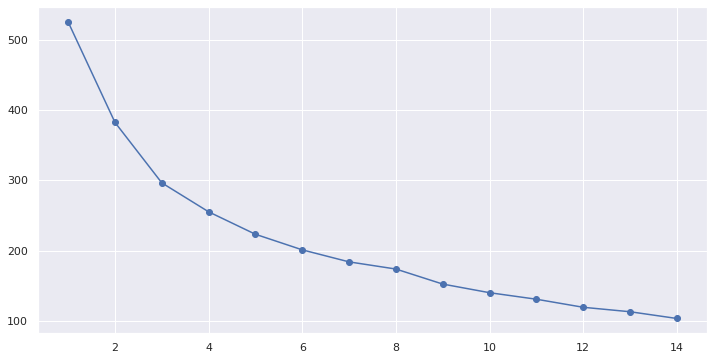

In [101]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

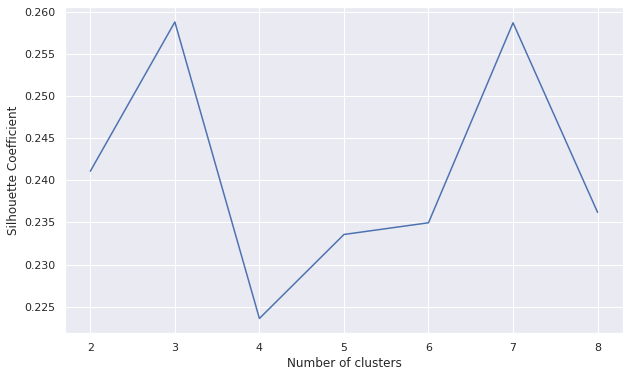

In [102]:
#finding best cluster by silhouette score
from sklearn import metrics

k_range = range(2, 9)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(cluster_data_sc)
    scores.append(metrics.silhouette_score(cluster_data_sc, km.labels_))

# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)


In [103]:
X=cluster_data_sc

For n_clusters = 2 The average silhouette_score is : 0.2412012067280619
For n_clusters = 3 The average silhouette_score is : 0.25876388275119505
For n_clusters = 4 The average silhouette_score is : 0.25126065468416553
For n_clusters = 5 The average silhouette_score is : 0.24185944209712607
For n_clusters = 6 The average silhouette_score is : 0.24759701223940414
For n_clusters = 7 The average silhouette_score is : 0.2284167799710091
For n_clusters = 8 The average silhouette_score is : 0.2507022891377647
For n_clusters = 9 The average silhouette_score is : 0.26496988192925125
For n_clusters = 10 The average silhouette_score is : 0.2789398584077342
For n_clusters = 11 The average silhouette_score is : 0.3019211638167004
For n_clusters = 12 The average silhouette_score is : 0.2806234072375082
For n_clusters = 13 The average silhouette_score is : 0.3059422617644439
For n_clusters = 14 The average silhouette_score is : 0.2894544034218215
For n_clusters = 15 The average silhouette_score is : 

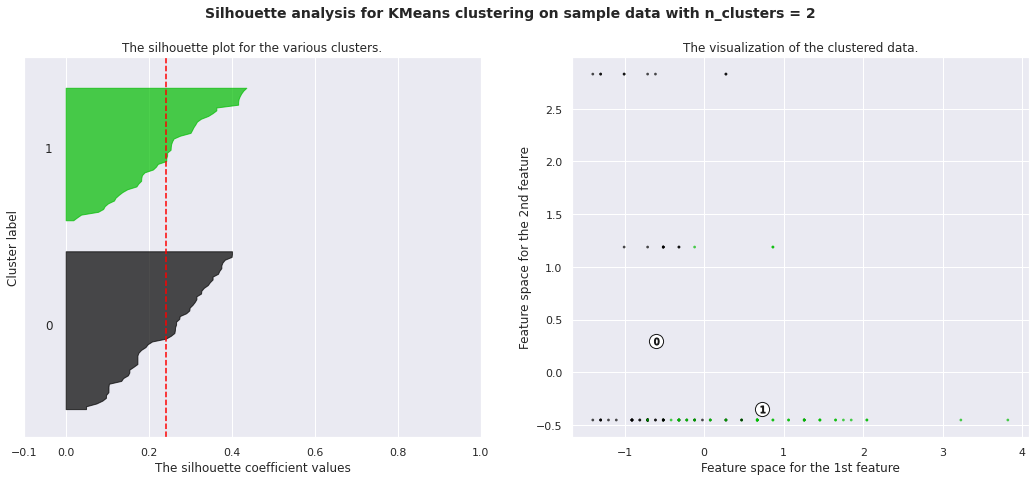

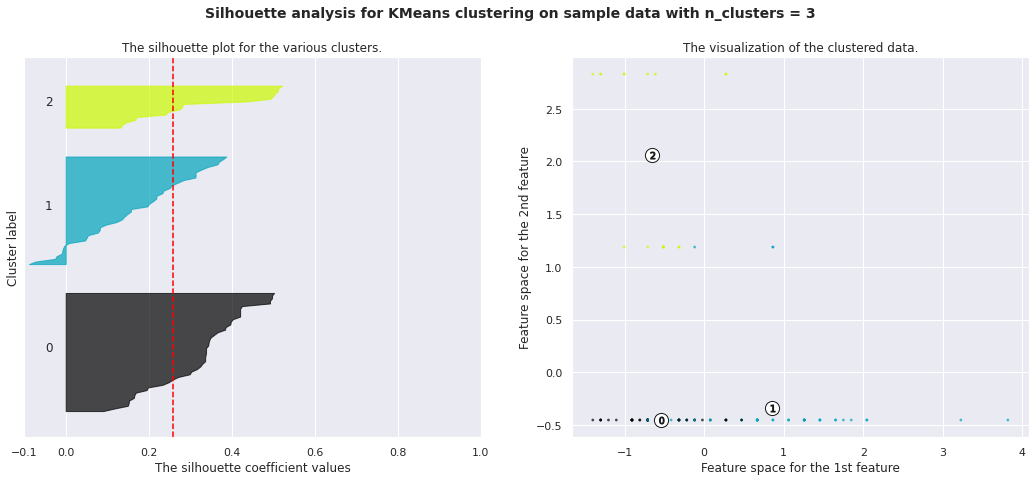

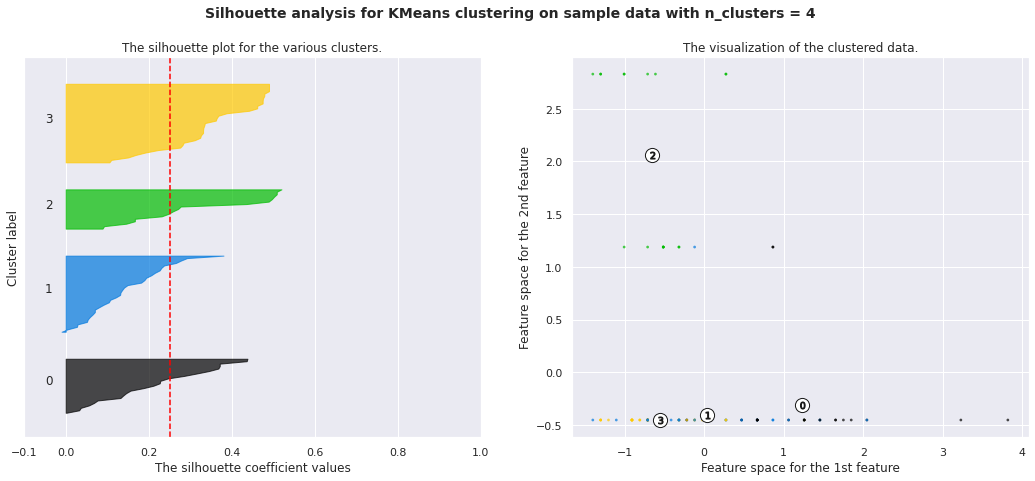

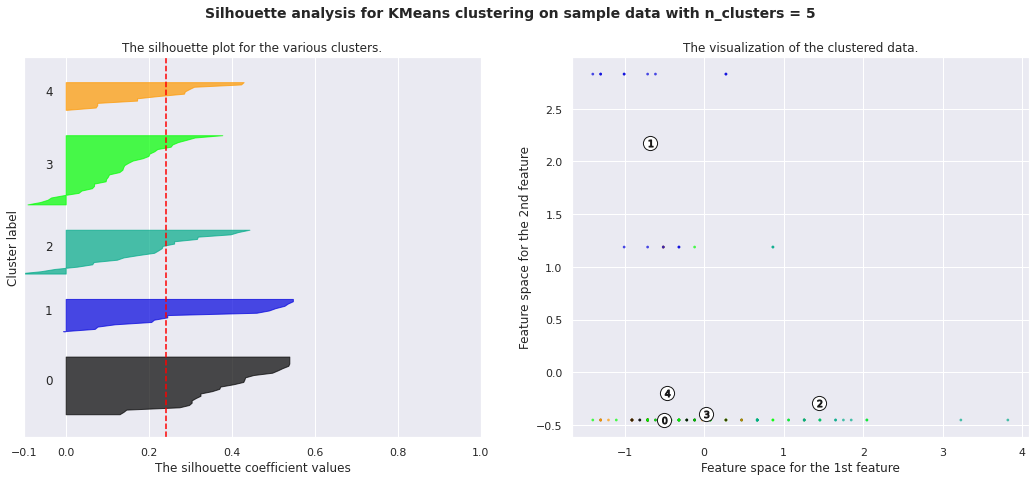

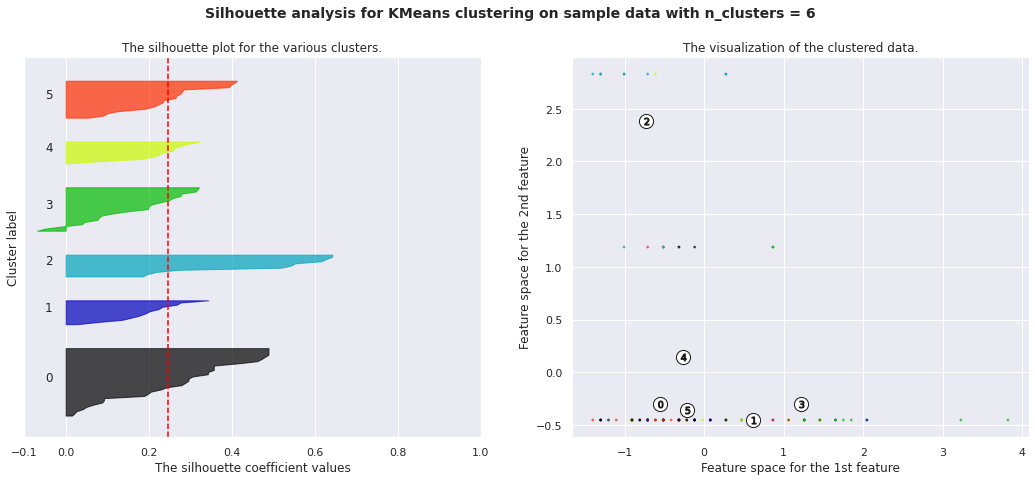

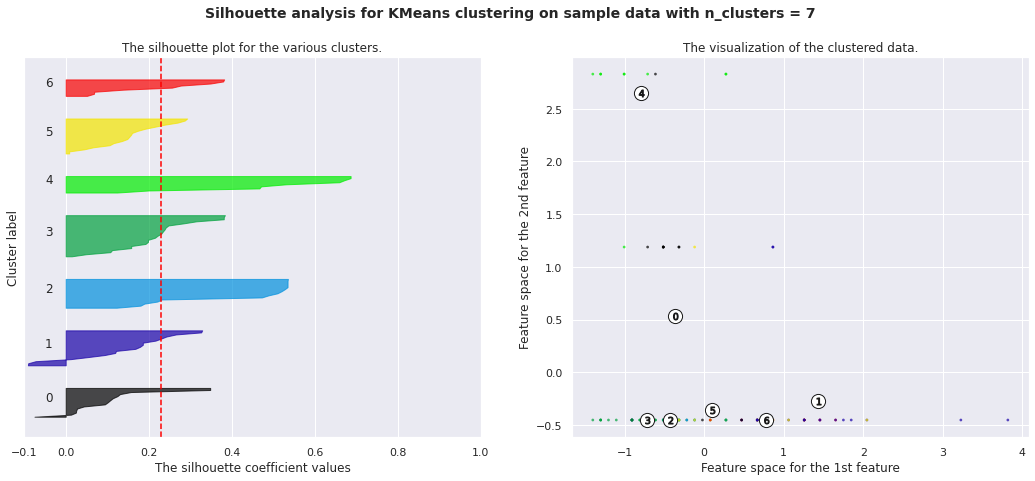

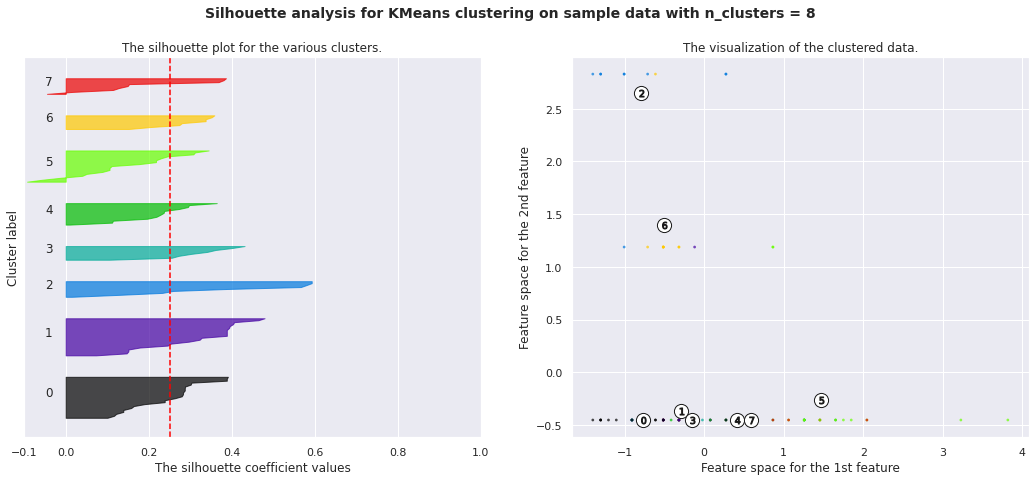

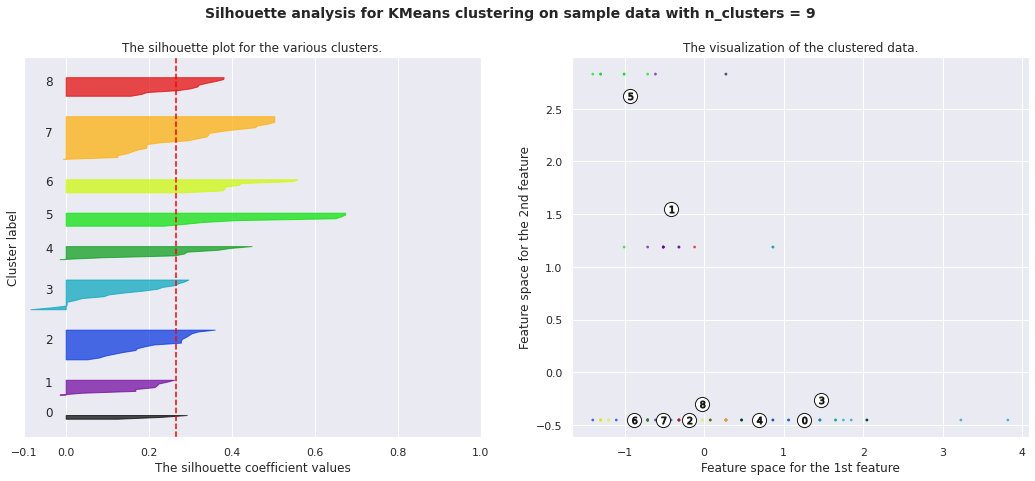

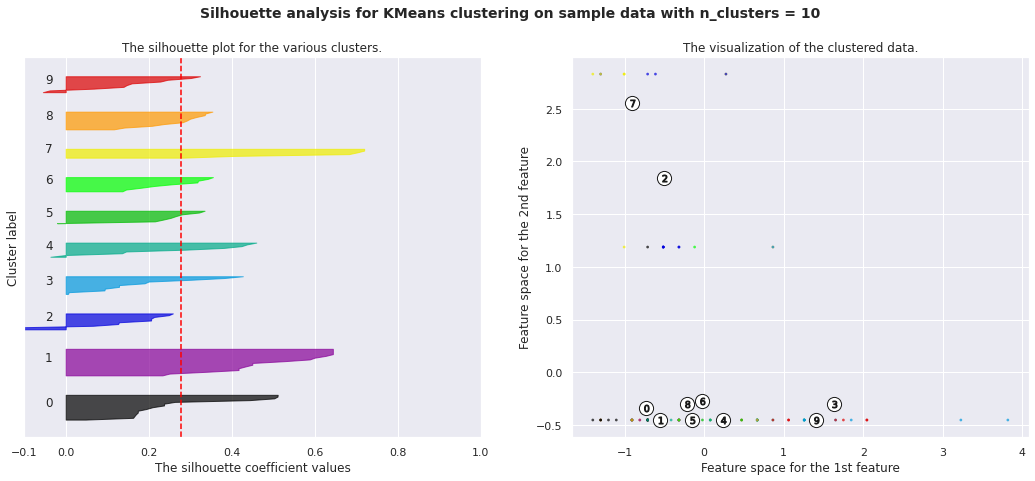

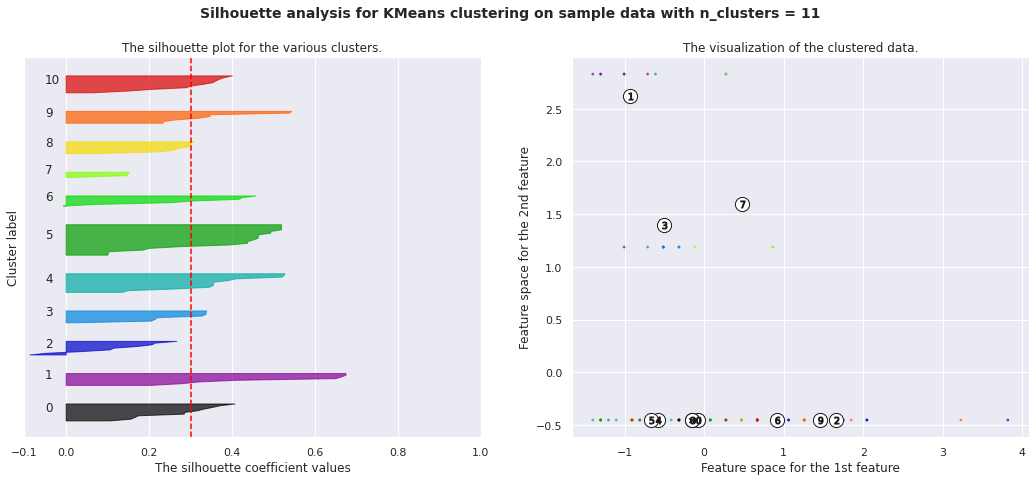

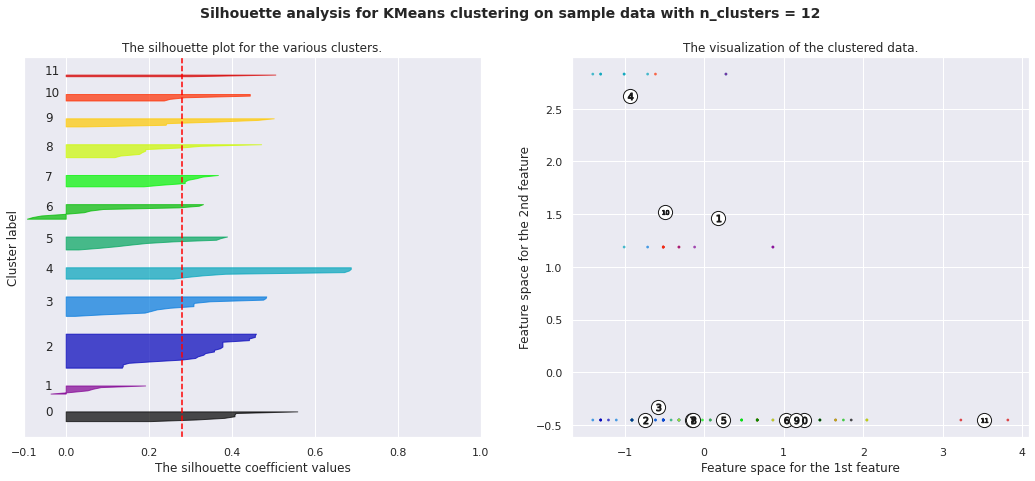

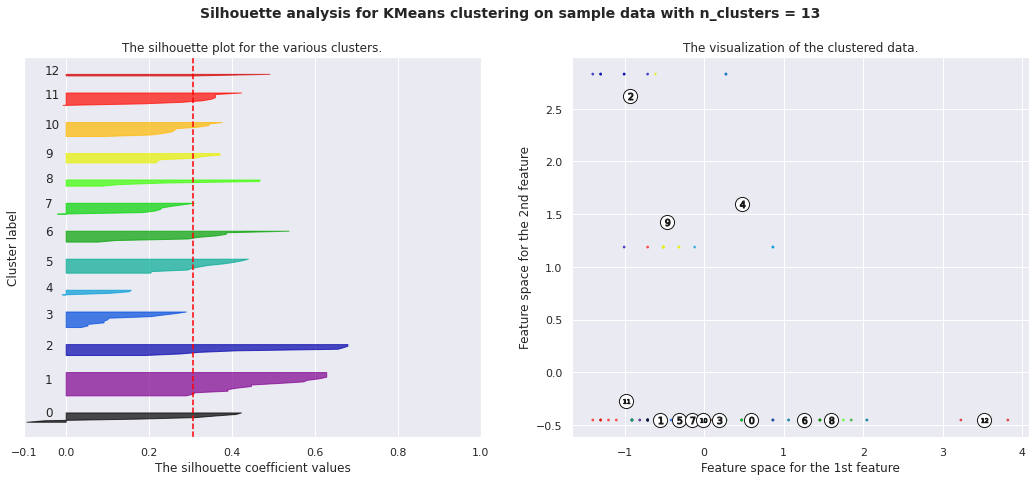

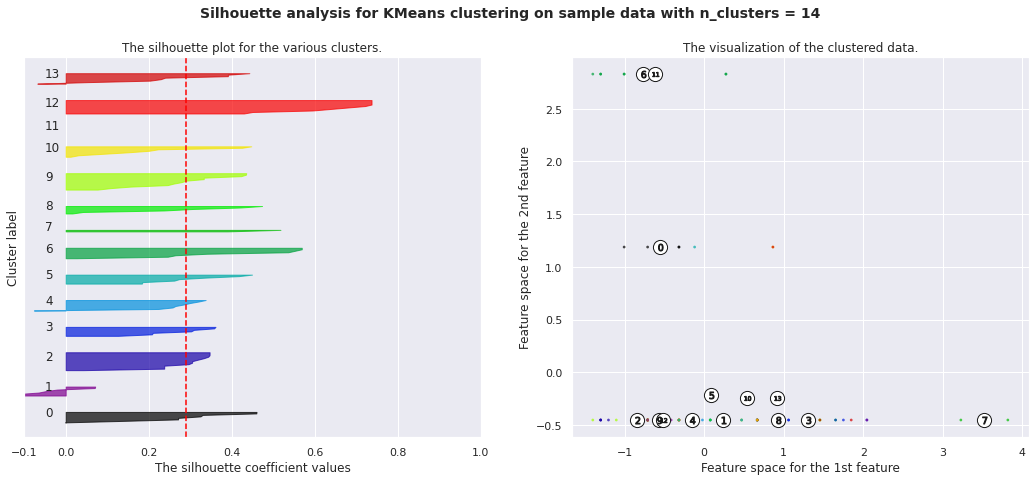

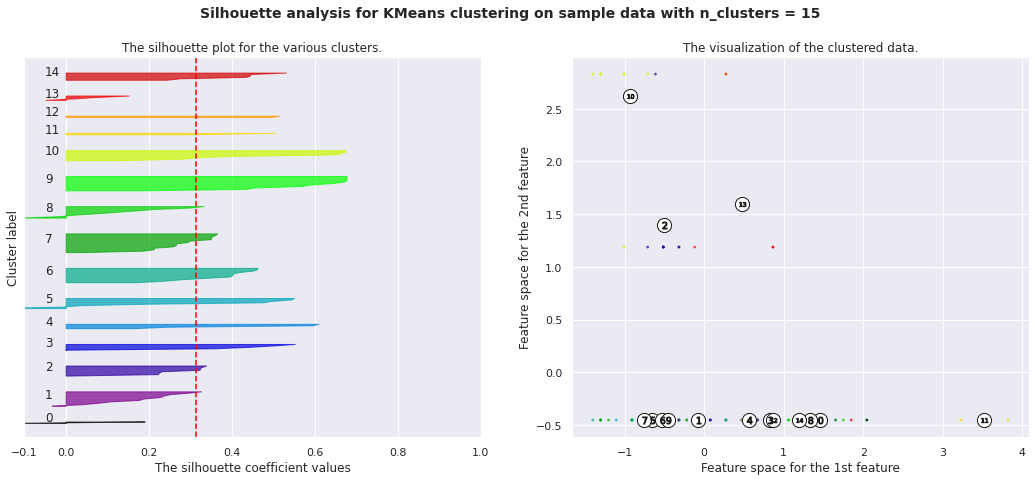

In [104]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

**From silhouttee coefficients we are getting 3 as our optimum number of clusters**

In [105]:
# finding the predicted values bu kmeans 
km = KMeans(n_clusters=3, n_init=1000, max_iter=500, random_state=1)
y_predicted = km.fit_predict(cluster_data_sc)
y_predicted

array([2, 1, 2, 2, 1, 2, 1, 0, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 0, 2, 1,
       1, 2, 0, 1, 0, 1, 1, 2, 1, 0, 0, 2, 0, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 0, 0, 0, 2, 1, 2, 1, 0, 1, 1, 2, 1, 1, 2, 1, 1,
       2, 2, 1, 1, 0, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 0, 1, 1, 0, 0,
       2, 0, 2, 2, 2, 0, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2], dtype=int32)

In [106]:
# finding the total numbers of labes in each cluster
pd.Series(km.labels_).value_counts()

1    46
2    42
0    17
dtype: int64

In [107]:
# updating the cluster values in df
cluster_df['cluster']=y_predicted
cluster_df['Cuisines'] = cluster_df['Cuisines'].apply(lambda x : x.split(", "))
exploded = cluster_df.explode("Cuisines")
exploded.head()

Name  Cost      Cuisines  cuisine_Dessert  \
0               10 Downing Street  1900  north indian                0   
0               10 Downing Street  1900       chinese                0   
0               10 Downing Street  1900   continental                0   
1                        13 Dhaba   450  north indian                0   
2  3B's - Buddies, Bar & Barbecue  1100  north indian                0   

   cuisine_spicy food  cuisine_fast food  cuisine_Healthy food  cluster  
0                   2                  1                     0        2  
0                   2                  1                     0        2  
0                   2                  1                     0        2  
1                   1                  0                     0        1  
2                   1                  0                     2        2

**expracting the unique values from diffrent clusters**

In [108]:
exploded[exploded["cluster"]==0]['Cuisines'].unique()

array(['ice cream', 'desserts', 'cafe', 'bakery', 'continental',
       'fast food', 'beverages', 'burger', 'biryani', 'north indian',
       'mughlai', 'juices', 'chinese', 'mithai', 'american', 'wraps'],
      dtype=object)

In [109]:
exploded[exploded["cluster"]==1]['Cuisines'].unique()

array(['north indian', 'continental', 'american', 'chinese', 'fast food',
       'salad', 'burger', 'biryani', 'mughlai', 'asian', 'seafood',
       'momos', 'pizza', 'hyderabadi', 'japanese', 'sushi', 'finger food',
       'kebab', 'arabian', 'south indian', 'street food', 'lebanese',
       'andhra', 'thai', 'north eastern'], dtype=object)

In [110]:
exploded[exploded["cluster"]==2]['Cuisines'].unique()

array(['north indian', 'chinese', 'continental', 'mediterranean',
       'european', 'seafood', 'biryani', 'hyderabadi', 'american',
       'south indian', 'andhra', 'kebab', 'bbq', 'italian', 'asian',
       'mughlai', 'beverages', 'modern indian', 'desserts', 'spanish',
       'japanese', 'salad', 'sushi', 'mexican', 'thai', 'malaysian',
       'indonesian', 'goan', 'finger food', 'healthy food'], dtype=object)

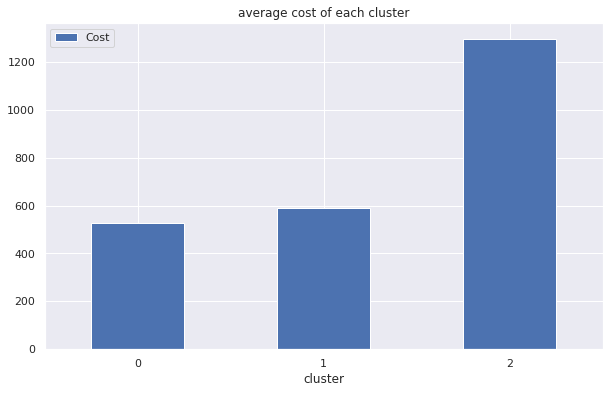

In [111]:
# ploting average cost of each cluster
pd.DataFrame(cluster_df.groupby('cluster')['Cost'].mean()).plot(kind="bar")
plt.xticks(rotation=0)
plt.title('average cost of each cluster')
plt.show()


In [112]:
cluster_df.loc[:,['Name','Cost','Cuisines','cluster']].head(30)

Name  Cost  \
0                         10 Downing Street  1900   
1                                  13 Dhaba   450   
2            3B's - Buddies, Bar & Barbecue  1100   
3                 AB's - Absolute Barbecues  1500   
4                         Absolute Sizzlers   750   
5                        Al Saba Restaurant   750   
6                       American Wild Wings   600   
7                                      Amul   150   
8                          Angaara Counts 3   500   
9                              Arena Eleven  1600   
10                             Aromas@11SIX   750   
11                           Asian Meal Box   200   
12                                   B-Dubs  1600   
13      Banana Leaf Multicuisine Restaurant   700   
14                          Barbeque Nation  1600   
15                          Behrouz Biryani   600   
16                             Being Hungry   450   
17                          Beyond Flavours   800   
18                        Biryanis And More   500   
19                               Cafe Eclat   700   
20  Cascade - Radisson Hyderabad Hitec City  1800   
21                         Chinese Pavilion  1000   
22                               Club Rogue   900   
23     Collage - Hyatt Hyderabad Gachibowli  2800   
24                              Cream Stone   350   
25                                 Delhi-39   600   
26                            Deli 9 Bistro   700   
27                               Desi Bytes   400   
28                             Dine O China   850   
29                          Diners Pavilion  1200   

                                             Cuisines  cluster  
0                [north indian, chinese, continental]        2  
1                                      [north indian]        1  
2             [north indian, mediterranean, european]        2  
3             [european, mediterranean, north indian]        2  
4                    [continental, american, chinese]        1  
5   [north indian, chinese, seafood, biryani, hyde...        2  
6                [american, fast food, salad, burger]        1  
7                               [ice cream, desserts]        0  
8                    [north indian, biryani, chinese]        1  
9                                       [continental]        2  
10          [north indian, chinese, mughlai, biryani]        1  
11                                            [asian]        1  
12                                         [american]        2  
13  [biryani, south indian, north indian, chinese,...        2  
14          [mediterranean, north indian, kebab, bbq]        2  
15                                 [mughlai, biryani]        1  
16                            [north indian, chinese]        1  
17  [chinese, continental, kebab, european, south ...        2  
18                   [north indian, biryani, chinese]        1  
19                                     [cafe, bakery]        0  
20        [north indian, italian, continental, asian]        2  
21                                 [chinese, seafood]        1  
22                          [north indian, fast food]        1  
23  [continental, italian, north indian, chinese, ...        2  
24                              [ice cream, desserts]        0  
25                            [north indian, chinese]        1  
26                      [cafe, continental, desserts]        0  
27                            [north indian, chinese]        1  
28                            [chinese, asian, momos]        1  
29                    [chinese, continental, italian]        2

**Herarchica Clustering**

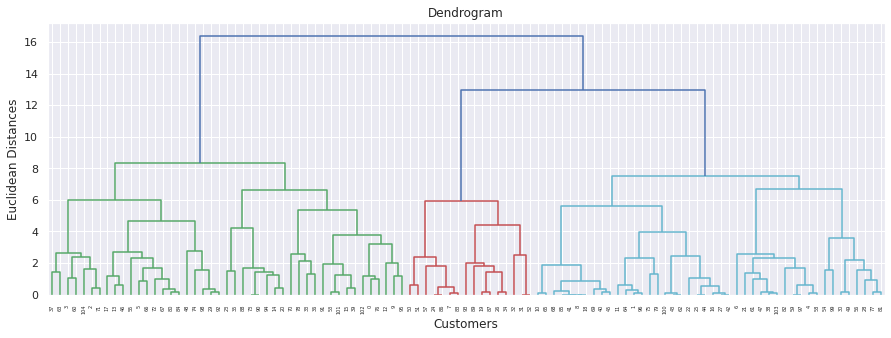

In [113]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(15,5))
dendrogram = sch.dendrogram(sch.linkage(cluster_data_sc, method = 'ward'))

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')

plt.show() # find largest vertical distance we can make without crossing any other horizontal line

In [114]:
# Fitting hierarchical clustering to the mall dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(cluster_data_sc)

cluster_df['cluster_hr']=y_hc

result=cluster_df.loc[:,['Name','Cost','Cuisines','cluster','cluster_hr']]

result.head(20)


Name  Cost  \
0                     10 Downing Street  1900   
1                              13 Dhaba   450   
2        3B's - Buddies, Bar & Barbecue  1100   
3             AB's - Absolute Barbecues  1500   
4                     Absolute Sizzlers   750   
5                    Al Saba Restaurant   750   
6                   American Wild Wings   600   
7                                  Amul   150   
8                      Angaara Counts 3   500   
9                          Arena Eleven  1600   
10                         Aromas@11SIX   750   
11                       Asian Meal Box   200   
12                               B-Dubs  1600   
13  Banana Leaf Multicuisine Restaurant   700   
14                      Barbeque Nation  1600   
15                      Behrouz Biryani   600   
16                         Being Hungry   450   
17                      Beyond Flavours   800   
18                    Biryanis And More   500   
19                           Cafe Eclat   700   

                                             Cuisines  cluster  cluster_hr  
0                [north indian, chinese, continental]        2           0  
1                                      [north indian]        1           1  
2             [north indian, mediterranean, european]        2           0  
3             [european, mediterranean, north indian]        2           0  
4                    [continental, american, chinese]        1           1  
5   [north indian, chinese, seafood, biryani, hyde...        2           0  
6                [american, fast food, salad, burger]        1           1  
7                               [ice cream, desserts]        0           2  
8                    [north indian, biryani, chinese]        1           1  
9                                       [continental]        2           0  
10          [north indian, chinese, mughlai, biryani]        1           1  
11                                            [asian]        1           1  
12                                         [american]        2           0  
13  [biryani, south indian, north indian, chinese,...        2           0  
14          [mediterranean, north indian, kebab, bbq]        2           0  
15                                 [mughlai, biryani]        1           0  
16                            [north indian, chinese]        1           1  
17  [chinese, continental, kebab, european, south ...        2           0  
18                   [north indian, biryani, chinese]        1           1  
19                                     [cafe, bakery]        0           2

In [115]:
# updating the cluster values in df
exploded_hr = result.explode("Cuisines")
exploded_hr.head()

Name  Cost      Cuisines  cluster  cluster_hr
0               10 Downing Street  1900  north indian        2           0
0               10 Downing Street  1900       chinese        2           0
0               10 Downing Street  1900   continental        2           0
1                        13 Dhaba   450  north indian        1           1
2  3B's - Buddies, Bar & Barbecue  1100  north indian        2           0

In [116]:
exploded_hr[exploded_hr["cluster_hr"]==0]['Cuisines'].unique()

array(['north indian', 'chinese', 'continental', 'mediterranean',
       'european', 'seafood', 'biryani', 'hyderabadi', 'american',
       'south indian', 'andhra', 'kebab', 'bbq', 'mughlai', 'italian',
       'asian', 'beverages', 'modern indian', 'desserts', 'spanish',
       'japanese', 'salad', 'sushi', 'mexican', 'bakery', 'juices',
       'thai', 'malaysian', 'indonesian', 'goan', 'finger food',
       'healthy food'], dtype=object)

In [117]:
exploded_hr[exploded_hr["cluster_hr"]==1]['Cuisines'].unique()

array(['north indian', 'continental', 'american', 'chinese', 'fast food',
       'salad', 'burger', 'biryani', 'mughlai', 'asian', 'seafood',
       'momos', 'pizza', 'hyderabadi', 'japanese', 'sushi', 'finger food',
       'kebab', 'arabian', 'south indian', 'street food', 'lebanese',
       'italian', 'thai', 'north eastern'], dtype=object)

In [118]:
exploded_hr[exploded_hr["cluster_hr"]==2]['Cuisines'].unique()

array(['ice cream', 'desserts', 'cafe', 'bakery', 'continental',
       'fast food', 'beverages', 'burger', 'biryani', 'mithai',
       'american', 'wraps'], dtype=object)

# Sentiment Analysis ( UnSupervised )


**Tokenization**

In [119]:
# setting tokens by TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(stop_words=stop_word_list)
transformed_reviews=tfidf.fit_transform(reviews_df['Reviews'])

**LDA**

In [120]:
from sklearn.decomposition import LatentDirichletAllocation

In [121]:
# Parameters tuning using Grid Search
from sklearn.model_selection import GridSearchCV

# LDA model
lda = LatentDirichletAllocation(n_components=5)
lda.fit(transformed_reviews)

LatentDirichletAllocation(n_components=5)

In [122]:
lda.components_

array([[0.20004566, 0.20003845, 0.20003156, ..., 0.21016798, 0.20001737,
        0.2000392 ],
       [0.20008348, 0.20006859, 0.20005414, ..., 0.20015302, 0.20002963,
        0.20006147],
       [0.44900184, 0.44787288, 0.30403541, ..., 0.92755128, 0.61085369,
        0.20004212],
       [0.20387353, 0.20001771, 0.2000144 , ..., 0.20004377, 0.20073455,
        0.38301469],
       [0.20004233, 0.20003476, 0.2000284 , ..., 0.2000805 , 0.20001667,
        0.20003383]])

In [123]:
# checking for top 15 words in each topic
for index,topic in enumerate(lda.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([tfidf.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['thank', 'receive', 'customer', 'taste', 'late', 'fast', 'bad', 'order', 'food', 'deliver', 'excellent', 'service', 'time', 'delivery', 'good']


THE TOP 15 WORDS FOR TOPIC #1
['liking', 'rain', 'mannered', 'sick', 'gentleman', 'reception', 'voice', 'sarvice', 'bro', 'gaming', 'bdub', 'awsome', 'job', 'gud', 'nice']


THE TOP 15 WORDS FOR TOPIC #2
['paneer', 'serve', 'rice', 'like', 'bad', 'veg', 'try', 'quantity', 'place', 'biryani', 'taste', 'food', 'good', 'order', 'chicken']


THE TOP 15 WORDS FOR TOPIC #3
['music', 'time', 'amazing', 'friend', 'love', 'staff', 'awesome', 'visit', 'nice', 'ambience', 'service', 'great', 'food', 'good', 'place']


THE TOP 15 WORDS FOR TOPIC #4
['brownie', 'order', 'shake', 'taste', 'donut', 'place', 'cake', 'chocolate', 'burger', 'food', 'good', 'ice', 'cream', 'tasty', 'bad']




In [124]:
!pip install pyLDAvis==2.1.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 4.2 MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97738 sha256=a2fee538f735fd172955adcc82ef130000a2851865878dc403dc374d0404058e
  Stored in directory: /root/.cache/pip/wheels/3b/fb/41/e32e5312da9f440d34c4eff0d2207b46dc9332a7b931ef1e89
Successfully built pyLDAvis


In [125]:
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping


In [126]:
# ploting the clusters top 30 terms 
lda_panel = pyLDAvis.sklearn.prepare(lda, transformed_reviews,tfidf,mds='tsne')
lda_panel

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
2      150.222153  -72.269554       1        1  42.884124
3       51.163364 -159.968018       2        1  31.145506
4      -73.144554   21.523815       3        1  10.591724
0      -66.410133 -110.606438       4        1  10.105750
1       54.417324   12.443444       5        1   5.272896, topic_info=           Term        Freq       Total Category  logprob  loglift
5506       good  625.000000  625.000000  Default  30.0000  30.0000
8918       nice  169.000000  169.000000  Default  29.0000  29.0000
3456   delivery  101.000000  101.000000  Default  28.0000  28.0000
1049        bad  142.000000  142.000000  Default  27.0000  27.0000
11909   service  230.000000  230.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
8918       nice   38.562337  169.878245   Topic5  -3.9158   1.4598
7609     liking    1.306874    3.021728   Topic5  -7.3005   2.1044
10828      rain    1.316205    3.114581   Topic5  -7.2934   2.0812
13770    timing    1.240374    3.932991   Topic5  -7.3527   1.7886
12805    stater    1.044516    4.547021   Topic5  -7.5246   1.4717

[342 rows x 6 columns], token_table=       Topic      Freq      Term
term                            
69         3  0.117264    accept
69         4  0.820848    accept
342        1  0.951059      aloo
348        3  0.555066  alphonso
385        1  0.302595   amazing
...      ...       ...       ...
14992      3  0.505844     wrost
15147      1  0.430177    zomato
15147      2  0.204846    zomato
15147      3  0.102423    zomato
15147      4  0.286784    zomato

[568 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 5, 1, 2])

In [127]:
# predicting the sentiments and storing in a feature
topic_results = lda.transform(transformed_reviews)
reviews_df['sentiments']=topic_results.argmax(axis=1)
reviews_df.head()

Restaurant              Reviewer  Rating                Time  \
0  Beyond Flavours     Rusha Chakraborty     5.0 2019-05-25 15:54:00   
1  Beyond Flavours  Anusha Tirumalaneedi     5.0 2019-05-25 14:20:00   
2  Beyond Flavours       Ashok Shekhawat     5.0 2019-05-24 22:54:00   
3  Beyond Flavours        Swapnil Sarkar     5.0 2019-05-24 22:11:00   
4  Beyond Flavours                Dileep     5.0 2019-05-24 21:37:00   

   Pictures                                            Reviews  Followers  \
0       0.0  ambience good food good saturday lunch cost ef...        2.0   
1       0.0  ambience good pleasant evening service prompt ...        2.0   
2       0.0  try great food great ambience thnx service pra...        3.0   
3       0.0  soumen das arun great guy behavior sincerety g...        1.0   
4       0.0  food goodwe order kodi drumstick basket mutton...        2.0   

     Year  Month  Hour  sentiments  
0  2019.0    5.0  15.0           3  
1  2019.0    5.0  14.0           3  
2  2019.0    5.0  22.0           3  
3  2019.0    5.0  22.0           3  
4  2019.0    5.0  21.0           3

In [128]:
reviews_df['Rating'].value_counts()

5.0    3826
4.0    2373
1.0    1735
3.0    1192
2.0     684
4.5      69
3.5      47
2.5      19
1.5       9
Name: Rating, dtype: int64

In [129]:
reviews_df.shape

(9954, 11)

In [130]:
reviews_df[reviews_df['sentiments']==4 ]['Rating'].value_counts()

5.0    237
1.0    223
4.0    149
3.0     76
2.0     64
4.5     19
3.5     10
2.5      3
1.5      1
Name: Rating, dtype: int64

In [131]:
reviews_df[reviews_df['sentiments']==3 ]['Rating'].value_counts()

5.0    1805
4.0     910
3.0     341
1.0     156
2.0     105
4.5      26
3.5      10
2.5       8
Name: Rating, dtype: int64

In [132]:
reviews_df[reviews_df['sentiments']==2 ]['Rating'].value_counts()

4.0    1176
5.0     988
1.0     971
3.0     701
2.0     448
3.5      26
4.5      23
2.5       7
1.5       7
Name: Rating, dtype: int64

In [133]:
reviews_df[reviews_df['sentiments']==1 ]['Rating'].value_counts()

5.0    113
4.0     16
1.0     14
2.0      7
3.0      5
Name: Rating, dtype: int64

In [134]:
reviews_df[reviews_df['sentiments']==0 ]['Rating'].value_counts()

5.0    683
1.0    371
4.0    122
3.0     69
2.0     60
3.5      1
4.5      1
2.5      1
1.5      1
Name: Rating, dtype: int64

In [135]:
reviews_df[reviews_df['Rating']==3].shape

(1192, 11)

**Non-negative matrix Factorization**

In [136]:
from sklearn.decomposition import NMF

nmf_model = NMF(n_components=5,random_state=42)

nmf_model.fit(transformed_reviews)

/usr/local/lib/python3.7/dist-packages/scipy/linalg/decomp_qr.py:20: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  kwargs['lwork'] = ret[-2][0].real.astype(numpy.int)
/usr/local/lib/python3.7/dist-packages/scipy/linalg/decomp_qr.py:20: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, ch

NMF(n_components=5, random_state=42)

In [137]:
# top most frequnt word used in each topic
for index,topic in enumerate(nmf_model.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([tfidf.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['test', 'polite', 'quality', 'price', 'packing', 'ambiance', 'quantity', 'spicy', 'ambience', 'burger', 'job', 'food', 'taste', 'service', 'good']


THE TOP 15 WORDS FOR TOPIC #1
['excellent', 'serve', 'try', 'friend', 'amazing', 'love', 'time', 'awesome', 'staff', 'visit', 'ambience', 'great', 'service', 'place', 'food']


THE TOP 15 WORDS FOR TOPIC #2
['music', 'sarvice', 'ambiance', 'overall', 'service', 'hangout', 'family', 'enjoy', 'thank', 'staff', 'ambience', 'place', 'friend', 'friendly', 'nice']


THE TOP 15 WORDS FOR TOPIC #3
['zomato', 'person', 'thank', 'awesome', 'guy', 'excellent', 'super', 'order', 'boy', 'quick', 'late', 'deliver', 'fast', 'time', 'delivery']


THE TOP 15 WORDS FOR TOPIC #4
['piece', 'try', 'fry', 'paneer', 'veg', 'restaurant', 'like', 'quality', 'rice', 'quantity', 'biryani', 'bad', 'order', 'taste', 'chicken']




In [138]:
topic_results = nmf_model.transform(transformed_reviews)

reviews_df['sentiments']=topic_results.argmax(axis=1)

reviews_df[reviews_df['sentiments']==4]['Rating'].value_counts()

1.0    1075
4.0     665
5.0     530
3.0     468
2.0     359
3.5      24
4.5      18
1.5       7
2.5       6
Name: Rating, dtype: int64

In [139]:
reviews_df[reviews_df['sentiments']==3 ]['Rating'].value_counts()

5.0    281
1.0     98
4.0     65
3.0     36
2.0     25
4.5      3
3.5      2
2.5      1
Name: Rating, dtype: int64

In [140]:
reviews_df.Reviews[1]

'ambience good pleasant evening service prompt food good good experience soumen das kudo service'

In [141]:
reviews_df.head()

Restaurant              Reviewer  Rating                Time  \
0  Beyond Flavours     Rusha Chakraborty     5.0 2019-05-25 15:54:00   
1  Beyond Flavours  Anusha Tirumalaneedi     5.0 2019-05-25 14:20:00   
2  Beyond Flavours       Ashok Shekhawat     5.0 2019-05-24 22:54:00   
3  Beyond Flavours        Swapnil Sarkar     5.0 2019-05-24 22:11:00   
4  Beyond Flavours                Dileep     5.0 2019-05-24 21:37:00   

   Pictures                                            Reviews  Followers  \
0       0.0  ambience good food good saturday lunch cost ef...        2.0   
1       0.0  ambience good pleasant evening service prompt ...        2.0   
2       0.0  try great food great ambience thnx service pra...        3.0   
3       0.0  soumen das arun great guy behavior sincerety g...        1.0   
4       0.0  food goodwe order kodi drumstick basket mutton...        2.0   

     Year  Month  Hour  sentiments  
0  2019.0    5.0  15.0           0  
1  2019.0    5.0  14.0           0  
2  2019.0    5.0  22.0           1  
3  2019.0    5.0  22.0           1  
4  2019.0    5.0  21.0           0

In [142]:
reviews_df['sentiments']=reviews_df['sentiments'].apply( lambda x : 'negative' if x==4 or x==3 else 'positive')

reviews_df[reviews_df['sentiments']=='negative']["Rating"].value_counts()

1.0    1173
5.0     811
4.0     730
3.0     504
2.0     384
3.5      26
4.5      21
2.5       7
1.5       7
Name: Rating, dtype: int64

In [143]:
reviews_df[reviews_df['sentiments']=='positive']["Rating"].value_counts()

5.0    3015
4.0    1643
3.0     688
1.0     562
2.0     300
4.5      48
3.5      21
2.5      12
1.5       2
Name: Rating, dtype: int64

# Sentiment Analysis (Superviesd)

**data Processing**

In [144]:
def sentiment(rating):
  if rating >=3.5:
    return 0 
    # positive sentiment
  else:
    return 1
    # neagative sentiment

sentiment_df=reviews_df[['Reviews','Rating']]

sentiment_df['sentiment']=sentiment_df['Rating'].apply(lambda x:sentiment(x))
sentiment_df

Reviews  Rating  sentiment
0     ambience good food good saturday lunch cost ef...     5.0          0
1     ambience good pleasant evening service prompt ...     5.0          0
2     try great food great ambience thnx service pra...     5.0          0
3     soumen das arun great guy behavior sincerety g...     5.0          0
4     food goodwe order kodi drumstick basket mutton...     5.0          0
...                                                 ...     ...        ...
9995  madhumathi mahajan start nice courteous server...     3.0          1
9996  place disappoint food courteous staff serene a...     4.5          0
9997  bad rating mainly chicken bone find veg food a...     1.5          1
9998  personally love prefer chinese food couple tim...     4.0          0
9999  check try delicious chinese food nonveg lunche...     3.5          0

[9954 rows x 3 columns]

In [145]:
# defining blank list for the input of scores of models
model_accuracy=[]
model_precision=[]
model_recall=[]
model_f1_score=[]
model_roc_auc_score=[]
model_train_time=[]

In [146]:
# making a function to train the model and evaluate the model
def train_and_score (model,X_test,X_train,y_test,y_train, best_parameter=True, best_score=True):
  '''
  train the model and gives mse,rmse,r2,adj r2 score of the model
  can be used for any model where y is not transformed 
  '''

  #storing the start time of model training
  start=time.time()
  #training the model
  model.fit(X_train,y_train)
  #storing the time when the model ended trining 
  stop = time.time()
  #calculating the total time taken for model training 
  time_min=round((stop - start)/60,4)
  # printing the time taken to train the model
  print(f"Training time: {time_min}min")
  model_train_time.append(time_min)
  
  

  # finding the best parameters of the model if any 
  if best_parameter==True:
    # using try except method to avoid any error
    try:
      print("The best parameters found out to be :" ,model.best_params_)
    except:
      pass
  # finding best score of the model 
  if best_score==True:
    try:
      print(" \nwhere negative mean squared error is: ", model.best_score_,'\n')
    except:
      pass


  #predicting the values of y from x via model
  y_pred_test = model.predict(X_test)
  y_pred_train = model.predict(X_train)

  def score (actual,predicted,append=True):
    '''
    calcuating diffrent score matrix of the model
    '''
    # calculating accuracy score
    accuracy = accuracy_score(actual,predicted)
    # calculating precision score
    precision = precision_score(actual,predicted)
    # calculating recall score
    recall = recall_score(actual,predicted)
    # calculating f1_score score
    f1 = f1_score(actual,predicted)
    # calculating roc_auc_score score
    roc= roc_auc_score(actual,predicted)
    
    # printing all the scores
    print("\tThe accuracy is ", accuracy)
    print("\tThe precision is ", precision)
    print("\tThe recall is ", recall)
    print("\tThe f1 is ", f1)
    print('\tthe auc  is ',roc,'\n')
    print('\t\t\t\tclassification report\n','*'*80,'\n',classification_report(actual,predicted))
    

    # uploading all the score of the matrix in in the list 
    if append==True:
      model_accuracy.append(accuracy)
      model_precision.append(precision)
      model_recall.append(recall)
      model_f1_score.append(f1)
      model_roc_auc_score.append(roc)
    else:
      pass
# printing the score by the help of coustom score function
  # for train set
  print('\t\t\t\tscore matrix for train')
  print('*'*80)
  score(y_train,y_pred_train,False)
  print('\n')
  # for test set
  print('\t\t\t\tscore matrix for test')
  print('*'*80)
  score(y_test,y_pred_test)

In [147]:
# creating x and y varibles for independent and dependent variable
x = sentiment_df['Reviews']
y = sentiment_df['sentiment']

In [148]:
#spliting the data into train and test 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.25,stratify=sentiment_df['sentiment'])

In [149]:
# creating topkens for text data
from sklearn.feature_extraction.text import  TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words="english",min_df=0.01,max_df=0.95)
X_train= vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)

# MultinomialNB

In [150]:
from sklearn.naive_bayes import MultinomialNB
# creating MultinomialNB model
model = MultinomialNB()
# training and evaluating the MultinomialNB
train_and_score(model,X_test,X_train,y_test,y_train)

Training time: 0.0002min
				score matrix for train
********************************************************************************
	The accuracy is  0.838312123241795
	The precision is  0.873405299313052
	The recall is  0.6522535727372664
	The f1 is  0.7468009230123767
	the auc  is  0.7988886106929576 

				classification report
 ******************************************************************************** 
               precision    recall  f1-score   support

           0       0.83      0.95      0.88      4736
           1       0.87      0.65      0.75      2729

    accuracy                           0.84      7465
   macro avg       0.85      0.80      0.81      7465
weighted avg       0.84      0.84      0.83      7465



				score matrix for test
********************************************************************************
	The accuracy is  0.8384893531538771
	The precision is  0.8670520231213873
	The recall is  0.6593406593406593
	The f1 is  0.749063670411985
	the au

#Decision Tree

In [179]:
#importing DecisionTree model
from sklearn.tree import DecisionTreeClassifier
# creating DecisionTree model
DecisionTree = DecisionTreeClassifier(max_depth=10,max_leaf_nodes=45,criterion='entropy')

# training and evaluating the DecisionTree
train_and_score(DecisionTree,X_test, X_train, y_test, y_train)

Training time: 0.0112min
				score matrix for train
********************************************************************************
	The accuracy is  0.8002679169457468
	The precision is  0.7277409860191317
	The recall is  0.7248076218395016
	The f1 is  0.7262713420231319
	the auc  is  0.7842788109197508 

				classification report
 ******************************************************************************** 
               precision    recall  f1-score   support

           0       0.84      0.84      0.84      4736
           1       0.73      0.72      0.73      2729

    accuracy                           0.80      7465
   macro avg       0.78      0.78      0.78      7465
weighted avg       0.80      0.80      0.80      7465



				score matrix for test
********************************************************************************
	The accuracy is  0.7826436319807152
	The precision is  0.6952380952380952
	The recall is  0.721978021978022
	The f1 is  0.708355795148248
	the a

# lightGBM

In [152]:
#impporting lightgbm
import lightgbm as lgb

#creating lightgbm model
lgbc=lgb.LGBMClassifier()

# finding the best parameters for XGBRegressor by gridsearchcv
lgbc_para={'n_estimators': [100,125,150],'max_depth': [15,20,25]}
lgbc_grid=GridSearchCV(estimator=lgbc,param_grid=lgbc_para,cv=3,scoring='recall',verbose=5,n_jobs=-1)

# training and evaluating the lgbr_grid
train_and_score(lgbc_grid,X_test, X_train, y_test, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Training time: 1.2304min
The best parameters found out to be : {'max_depth': 15, 'n_estimators': 125}
 
where negative mean squared error is:  0.7555902110357556 

				score matrix for train
********************************************************************************
	The accuracy is  0.9350301406563966
	The precision is  0.9177215189873418
	The recall is  0.9032612678636863
	The f1 is  0.9104339796860572
	the auc  is  0.9282987082561676 

				classification report
 ******************************************************************************** 
               precision    recall  f1-score   support

           0       0.94      0.95      0.95      4736
           1       0.92      0.90      0.91      2729

    accuracy                           0.94      7465
   macro avg       0.93      0.93      0.93      7465
weighted avg       0.93      0.94      0.93      7465



				score matrix for test
***************************

#Random forest

In [156]:
#imorting Random forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [157]:
# creating RandomForestRegressor model
rfc=RandomForestClassifier()

In [158]:
rfc.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier()>

In [159]:
# finding the best parameters for knn_model by gridsearchcv
grid_values_rf = {'n_estimators': [100,125,150],'max_depth': [7,10,15],'criterion': ['entropy']}
rfc_grid = GridSearchCV(estimator=rfc,param_grid = grid_values_rf, scoring='recall',cv=5,verbose=5,n_jobs=-1)

In [160]:
# training and evaluating the Random Forest Regressor
train_and_score(rfc_grid,X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Training time: 0.4939min
The best parameters found out to be : {'criterion': 'entropy', 'max_depth': 15, 'n_estimators': 100}
 
where negative mean squared error is:  0.5450549450549451 

				score matrix for train
********************************************************************************
	The accuracy is  0.875050220972278
	The precision is  0.9776714513556619
	The recall is  0.6736263736263737
	The f1 is  0.7976577748861419
	the auc  is  0.8323800012527055 

				classification report
 ******************************************************************************** 
               precision    recall  f1-score   support

           0       0.84      0.99      0.91      1579
           1       0.98      0.67      0.80       910

    accuracy                           0.88      2489
   macro avg       0.91      0.83      0.85      2489
weighted avg       0.89      0.88      0.87      2489



				score matrix for test
****

# XGboost

In [161]:
from xgboost import XGBClassifier

In [162]:
xgbc=XGBClassifier()

In [163]:
# finding the best parameters for XGBRegressor by gridsearchcv
xgbc_param={'n_estimators': [100,125,150],'max_depth': [7,10,15],'criterion': ['entropy']}
xgbc_grid=GridSearchCV(estimator=xgbc,param_grid=xgbc_param,cv=3,scoring='recall',verbose=5,n_jobs=-1)

In [164]:
# training and evaluating the xgb_grid
train_and_score(xgbc_grid,X_test, X_train, y_test, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Training time: 1.5988min
The best parameters found out to be : {'criterion': 'entropy', 'max_depth': 7, 'n_estimators': 150}
 
where negative mean squared error is:  0.7486248624862486 

				score matrix for train
********************************************************************************
	The accuracy is  0.9184192900200938
	The precision is  0.9027355623100304
	The recall is  0.870648589226823
	The f1 is  0.8864017907106883
	the auc  is  0.9082972675863845 

				classification report
 ******************************************************************************** 
               precision    recall  f1-score   support

           0       0.93      0.95      0.94      4736
           1       0.90      0.87      0.89      2729

    accuracy                           0.92      7465
   macro avg       0.91      0.91      0.91      7465
weighted avg       0.92      0.92      0.92      7465



				score matrix for test
*****

# Logistic Regression

In [176]:
#importing LogisticRegression model
from sklearn.linear_model import LogisticRegression

In [177]:

# creating LogisticRegression model
log_reg = LogisticRegression()

In [178]:
# training and evaluating the Logistic Regression
train_and_score(log_reg_grid, X_test, X_train, y_test, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring(

Training time: 0.0624min
The best parameters found out to be : {'C': 100, 'max_iter': 1000, 'penalty': 'l2'}
 
where negative mean squared error is:  0.7673192862183688 

				score matrix for train
********************************************************************************
	The accuracy is  0.8683188211654387
	The precision is  0.8314350797266514
	The recall is  0.8024917552216929
	The f1 is  0.8167070669401453
	the auc  is  0.8543708776108465 

				classification report
 ******************************************************************************** 
               precision    recall  f1-score   support

           0       0.89      0.91      0.90      4736
           1       0.83      0.80      0.82      2729

    accuracy                           0.87      7465
   macro avg       0.86      0.85      0.86      7465
weighted avg       0.87      0.87      0.87      7465



				score matrix for test
********************************************************************************

# **Score matrix for all the models**

In [169]:
#creating dictionary to store all the metrices 
dict={'accuracy':model_accuracy,'precision':model_precision,'recall':model_recall,'f1':model_f1_score,'roc_auc':model_roc_auc_score,'train_time':model_train_time}


In [172]:
# list of all models
model_name=['MultinomialNB','Logistic Regression','Decision Tree','Random forest','XGboost','lightGBM',]

In [173]:
# converting dictionary to dataframe
matrix_df=pd.DataFrame.from_dict(dict,orient="index",columns=model_name)

In [174]:
# taking the transpose of the dataframe to make it more visual appealing
matrix_df=matrix_df.transpose().reset_index().rename(columns={'index':'Models'})
matrix_df

Models  accuracy  precision    recall        f1   roc_auc  \
0        MultinomialNB  0.838489   0.867052  0.659341  0.749064  0.800538   
1  Logistic Regression  0.782644   0.695238  0.721978  0.708356  0.769792   
2        Decision Tree  0.854560   0.812785  0.782418  0.797312  0.839277   
3        Random forest  0.806430   0.908917  0.522902  0.663875  0.746354   
4              XGboost  0.850944   0.811561  0.771429  0.790986  0.834099   
5             lightGBM  0.857774   0.813063  0.793407  0.803115  0.844138   

   train_time  
0      0.0002  
1      0.0033  
2      1.2304  
3      0.4939  
4      1.5988  
5      0.0968

In [175]:
matrix_df.train_time.sum()

3.4234

# **ROC curve for all the models**

In [180]:
# finding the best parameters for all the models
log_reg_best=log_reg_grid.best_estimator_
rfc_best=rfc_grid.best_estimator_
xgbc_best=xgbc_grid.best_estimator_
lgbc_best=lgbc_grid.best_estimator_


In [181]:
# predicting the sentiment by all models
y_preds_proba_mnbc = model.predict_proba(X_test)[::,1]
y_preds_proba_lr = log_reg_best.predict_proba(X_test)[::,1]
y_preds_proba_dtc = DecisionTree.predict_proba(X_test)[::,1]
y_preds_proba_rfc = rfc_best.predict_proba(X_test)[::,1]
y_preds_proba_xgbc = xgbc_best.predict_proba(X_test)[::,1]
y_preds_proba_lgbc = lgbc_best.predict_proba(X_test)[::,1]

In [182]:
from sklearn.metrics import roc_curve

In [183]:
classifiers_proba = [(model, y_preds_proba_mnbc),
                     (log_reg_best, y_preds_proba_lr), 
                    (DecisionTree, y_preds_proba_dtc), 
                    (rfc_best, y_preds_proba_rfc),
                    (xgbc_best, y_preds_proba_xgbc),
                    (lgbc_best, y_preds_proba_lgbc)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for pair in classifiers_proba:
    
    fpr, tpr, _ = roc_curve(y_test,  pair[1])
    auc = roc_auc_score(y_test, pair[1])
    
    result_table = result_table.append({'classifiers':pair[0].__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

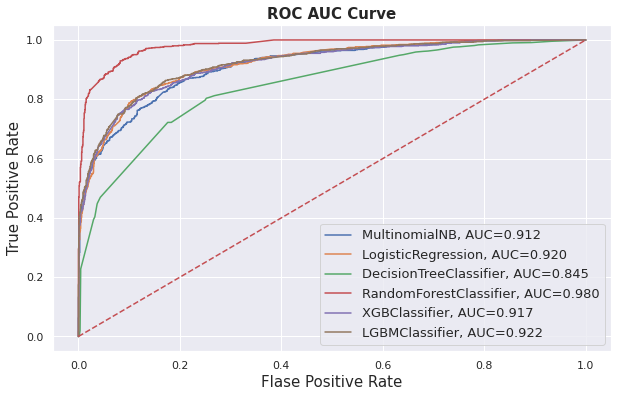

In [184]:
# ploting the roc auc curve for all models
fig = plt.figure(figsize=(10,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1],'r--')

plt.xlabel("Flase Positive Rate", fontsize=15)

plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC AUC Curve', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

# Conclusion
Based on the silhouette score plot and elbow plot, we decided on 3 clusters that were grouped using KMeans clustering and Hierarchical clustering. Best models we found for sentiment analysis(Supervised) are Lightgbm and decision tree.